In [1]:
### ValDXer testing
import os
os.environ["HDXER_PATH"] = "/home/alexi/Documents/HDXer"

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.XTC import XTCWriter

from pdbfixer import PDBFixer
from openmm.app import PDBFile

settings = Settings(name='test_full0.5')
settings.replicates = 1
settings.gamma_range = (2,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'R3'
settings.stride = 1000
# settings.HDXer_stride = 10000

settings.RW_do_reweighting = False
settings.RW_do_params = True
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MBPwt1_test"


/home/alexi/Documents/ValDX


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test_full0.5 already exists. Attempting t

In [2]:
# ### add code to read in sequence from CIF file instead of copying it manually

# cif_file = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/MBP/MaltoseBindingProtein/AF-P0AEX9-F1-model_v4.cif"

# sequence_header = "_entity_poly.pdbx_seq_one_letter_code"
# sequence = ""
# seq_head_idx = 0
# with open(cif_file, 'r') as f:
#     lines = f.readlines()
#     for idx, line in enumerate(lines):
#         if sequence_header in line:
#             seq_head_idx = idx+1
#             break
    
#     for idx, line in enumerate(lines[seq_head_idx:]):
#         if idx > 0 and line[0] == ";":
#             break
#         sequence += line.strip()


# # print(sequence)



# # strip sequence of non letters
# sequence = ''.join([i for i in sequence if i.isalpha()])

# print(sequence)

# print("Sequence length: ", len(sequence))


# # convert sequence to FASTA format
# def write_fasta(sequence, header, file_name):
#     """
#     Writes a single-letter amino acid sequence to a FASTA file.
    
#     Parameters:
#     - sequence: A string containing the amino acid sequence.
#     - header: A string to be used as the header in the FASTA file.
#     - file_name: The name of the FASTA file to be created.
#     """
#     print(f"Writing sequence to {file_name}")
#     with open(file_name, 'w') as fasta_file:
#         # Write the header with the '>' symbol
#         fasta_file.write(f">{header}\n")
        
#         # Write the sequence in lines of 80 characters
#         for i in range(0, len(sequence), 80):
#             fasta_file.write(sequence[i:i+80] + "\n")


In [3]:

# fasta_path = os.path.join("raw_data", "MBP", 'MBP_wt.fasta')
# write_fasta(sequence, 'MBP_wt', fasta_path)



In [4]:
# raw_hdx_path = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/MBP/MaltoseBindingProtein/MBP analysis final editing export 2020 10 05_tidy.csv"
# raw_hdx = pd.read_csv(raw_hdx_path)
# raw_hdx.tail()

In [5]:
# state = "WT Null"

# raw_hdx = raw_hdx[raw_hdx['hx_sample'] == state]

# # drop nans in column d
# raw_hdx = raw_hdx.dropna(subset=['d'])

# raw_hdx.head()


In [6]:
# # group by pep_start and pep_end and hx_time and take the mean of the d values
# grouped = raw_hdx.groupby(['pep_start', 'pep_end',"hx_time"])["d"].mean().reset_index()

# grouped.head()

# # assign peptide number to each combination of pep_start and pep_end
# grouped['peptide']= grouped.groupby(['pep_start', 'pep_end']).ngroup()



In [7]:
# # print entire dataframe
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)

# print(grouped)


In [8]:
# # add MaxUptake column for each peptide

# # first, get the max uptake for each peptide
# max_uptake = grouped.groupby('peptide')['d'].max().reset_index()

# # assign the max uptake to each peptide
# grouped = grouped.merge(max_uptake, on='peptide', suffixes=('', '_max'))

# grouped.head()

In [9]:
# grouped['UptakeFraction'] = grouped['d'] / grouped['d_max']



# columns_to_drop = ['d', 'd_max']
# grouped = grouped.drop(columns=columns_to_drop)

# grouped.head()

In [10]:

# # pivot exposure and uptake fraction
# grouped = grouped.pivot(index=['pep_start', 'pep_end'], columns='hx_time', values='UptakeFraction').reset_index()

# # drop 
# grouped.head()


In [11]:

# # print entire dataframe
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# print(grouped)

In [12]:
# # conver to HDXer format ie start, end, exposure_1, exposure_2 

# # change Start to ResStr and End to ResEnd
# hdx = grouped.rename(columns={'pep_start': 'ResStr', 'pep_end': 'ResEnd'})

# # drop the exposure column
# hdx.columns.name = None

# print(hdx)


In [13]:

# hdx = hdx.round(5)
# hdx.to_csv(os.path.join("raw_data", "MBP", 'MBP_wt1.dat'), sep=' ', index=False)


In [14]:
# segs = hdx[['ResStr', 'ResEnd']].drop_duplicates().sort_values(by=['ResStr', 'ResEnd']).reset_index(drop=True)


In [15]:

# # convert to list of tuples
# segs = [tuple(x) for x in segs.values]

# print(segs)


In [16]:


# # write list as new lines with space delimiter
# with open(os.path.join("raw_data", "MBP", 'MBP_wt1_segs.txt'), 'w') as f:
#     for item in segs:
#         f.write("%s\n" % ' '.join(map(str, item)))

In [17]:

# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/MBP/MaltoseBindingProtein"
# sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

# pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

# print(pdb_list) 


# H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

# os.makedirs(H_sim_dir, exist_ok=True)

# for pdb in pdb_list:
#     fixer = PDBFixer(os.path.join(sim_dir, pdb))
#     fixer.addMissingHydrogens(7.0)
#     H_pdb_name = pdb.replace('.pdb', '_H.pdb')
#     PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

# pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]



Generate conformations with Alphafold

# need to find out how to generate a wide range of conformations

In [18]:
def pre_process_main():
    # BPTI data
    # BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/MBP/MaltoseBindingProtein"
    BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/MBP/MaltoseBindingProtein"
    # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"

    sim_name = 'MBPwt_AF'
    os.listdir(BPTI_dir)

    segs_name = "MBP_wt1_segs.txt"
    segs_path = os.path.join(BPTI_dir, segs_name)

    hdx_name = "MBP_wt1.dat"
    hdx_path = os.path.join(BPTI_dir, hdx_name)
    print(hdx_path)

    rates_name = "out__train_MD_Simulated_1Intrinsic_rates.dat"
    rates_path = os.path.join(BPTI_dir, rates_name)

    sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

    pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

    print(pdb_list) 


    H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

    os.makedirs(H_sim_dir, exist_ok=True)

    for pdb in pdb_list:
        continue
        fixer = PDBFixer(os.path.join(sim_dir, pdb))
        fixer.addMissingHydrogens(7.0)
        H_pdb_name = pdb.replace('.pdb', '_H.pdb')
        PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

    pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]


    top_path = "/home/alexi/Documents/ValDX/raw_data/MBP/MBP_wt_protonated.pdb"

    # pdb_paths = [os.path.join(H_sim_dir, i) for i in pdb_list]

    # print(top_path)
    # print(pdb_paths)


    # small_traj_name = top_path.replace(".pdb","_small.xtc")
    # small_traj_path = os.path.join(sim_dir, small_traj_name)

    # u = mda.Universe(top_path, pdb_paths)


        
    # with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
    #     for ts in u.trajectory:
    #             W.write(u.atoms)

    # traj_paths = [os.path.join(sim_dir, i) for i in os.listdir(sim_dir) if i.endswith(".pdb")]
    
    traj_paths = ["/home/alexi/Documents/ValDX/raw_data/MBP/MBP_wt_protonated.xtc"]

    print(traj_paths)
    return hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name


In [19]:
hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name = pre_process_main()

/home/alexi/Documents/ValDX/raw_data/MBP/MaltoseBindingProtein/MBP_wt1.dat
['MBP_wt_unrelaxed_rank_004_alphafold2_ptm_model_2_seed_000.pdb', 'MBP_wt_unrelaxed_rank_002_alphafold2_ptm_model_4_seed_000.pdb', 'MBP_wt_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb', 'MBP_wt_unrelaxed_rank_003_alphafold2_ptm_model_5_seed_000.pdb', 'MBP_wt_unrelaxed_rank_005_alphafold2_ptm_model_1_seed_000.pdb']
['/home/alexi/Documents/ValDX/raw_data/MBP/MBP_wt_protonated.xtc']


In [20]:
# # BPTI data
# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
# # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"


In [21]:
# expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

# os.listdir(expt_dir)

# segs_name = "BPTI_residue_segs.txt"
# segs_path = os.path.join(expt_dir, segs_name)

# hdx_name = "BPTI_expt_dfracs.dat"
# hdx_path = os.path.join(expt_dir, hdx_name)
# print(hdx_path)

# rates_name = "BPTI_Intrinsic_rates.dat"
# rates_path = os.path.join(expt_dir, rates_name)


In [22]:
# sim_name = 'BPTI_MD'

# sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

# os.listdir(sim_dir)

# md_reps = 1
# rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

# top_name = "bpti_5pti_eq6_protonly.gro"

# top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

# traj_name = "bpti_5pti_reimg_protonly.xtc"

# traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

# print(top_path)
# print(traj_paths)




In [23]:
def run_split_test(split_mode, name, system):

    # settings.split_mode = 'R'
    settings.split_mode = split_mode
    settings.name = "_".join([name, split_mode])
    settings.times = [30, 240, 1800, 14400,]
    VDX = ValDXer(settings)

    VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
    # VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

    VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

    run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
    analysis_dump, df, name = VDX.dump_analysis()
    save_path = VDX.save_experiment()

    return run_outputs, analysis_dump, df, name, save_path

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py


Experiment name AvsB_S already exists. Attempting to change name to AvsB_S0
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S1
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S2
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S3
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S4
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S5
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S6
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S7
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S8
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S9
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S10
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S11
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S12
Experimen

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:241: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:30

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_meth

/home/alexi/Documents/ValDX/data/AvsB_S35/train_MBPwt1_test_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/AvsB_S35/train_MBPwt1_test_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/AvsB_S35/train_MBPwt1_test_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/AvsB_S35/train_MBPwt1_test_1/reweighting_gamma_5x10^0



Contacts readContacts readContacts read


Contacts readHbonds readHbonds readHbonds read



Hbonds read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
Segments and experimental dfracs read
Finished reweighting
[(array([0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.00909

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 15

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_MBPwt1_test_1
    ResStr  ResEnd  peptide                                               path
0       19      30        0  /home/alexi/Documents/ValDX/data/AvsB_S35/val_...
1       19      31        1  /home/alexi/Documents/ValDX/data/AvsB_S35/val_...
2       24      35        2  /home/alexi/Documents/ValDX/data/AvsB_S35/val_...
3       31      53        3  /home/alexi/Documents/ValDX/data/AvsB_S35/val_...
4       32      46        4  /home/alexi/Documents/ValDX/data/AvsB_S35/val_...
5       47      54        5  /home/alexi/Documents/ValDX/data/AvsB_S35/val_...
6       55      72        6  /home/alexi/Documents/ValDX/data/AvsB_S35/val_...
7       73      80        7  /home/alexi/Documents/ValDX/data/AvsB_S35/val_...
8       73      81        8  /home/alexi/Documents/ValDX/data/AvsB_S35/val_...
9       73      86        9  /home/alexi/Documents/ValDX/data/AvsB_S35/val_...
10      73      87       10  /home/alexi/Documents/ValDX/data/AvsB_S35/val_...
11      81      86  

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(135,)
[ 0.84409502  0.72910898  0.73783115  1.06477429  1.28568182  1.65238832
  2.76202889  5.25805571  5.00203124  6.63064973  6.38049422  3.55219307
  6.03807976 11.40305127 15.45387629 13.57989567 19.20907604 19.54439897
 16.90234492 15.3723437   8.78770152  5.11621838  8.77565406 15.51654487
 14.51011956  7.01677361 13.8395394  15.85139572 12.28617645 10.19174481
 10.77924471 14.97241201 13.94286879 10.88109043 15.87371473 17.26985031
  9.29950665  8.61560633 10.57204815  7.02846312  9.5344831  11.8124556
 12.35802371 10.15628548  9.3620611  12.4180362  12.20735008  1.71424243
  3.71181714 10.49367829 10.16627863  6.73119162  9.65634969 13.52699199
  5.46010093 10.59459541 17.34834987  9.66047388  5.08353098  7.26552673
 10.55069059 14.94309832 13.1594866  15.0372006  17.2774312  13.49084789
 13.70303325 10.8730686  14.3126239  11.03654017 10.09020862 12.69116263
 16.11271852 16.90395828 11.21390254 17.16697744  9.05955698  5.97603025
  5.41446861  9.72216544 1

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(333,)
[ 0.84409502  0.72910898  0.73783115  1.06477429  1.28568182  1.65238832
  2.76202889  5.25805571  5.00203124  6.63064973  6.38049422  3.55219307
  6.03807976 11.40305127 15.45387629 13.57989567 19.20907604 19.54439897
 16.90234492 15.3723437   8.78770152  5.11621838  8.77565406 15.51654487
 14.51011956  7.01677361 13.8395394  15.85139572 12.28617645 10.19174481
 10.77924471 14.97241201 13.94286879 10.88109043 15.87371473 17.26985031
  9.29950665  8.61560633 10.57204815  7.02846312  9.5344831  11.8124556
 12.35802371 10.15628548  9.3620611  12.4180362  12.20735008  1.71424243
  3.71181714 10.49367829 10.16627863  6.73119162  9.65634969 13.52699199
  5.46010093 10.59459541 17.34834987  9.66047388  5.08353098  7.26552673
 10.55069059 14.94309832 13.1594866  15.0372006  17.2774312  13.49084789
 13.70303325 10.8730686  14.3126239  11.03654017 10.09020862 12.69116263
 16.11271852 16.90395828 11.21390254 17.16697744  9.05955698  5.97603025
  5.41446861  9.72216544 1

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning

Finished running VDX loop
Evaluating HDX
plotting gamma distributions


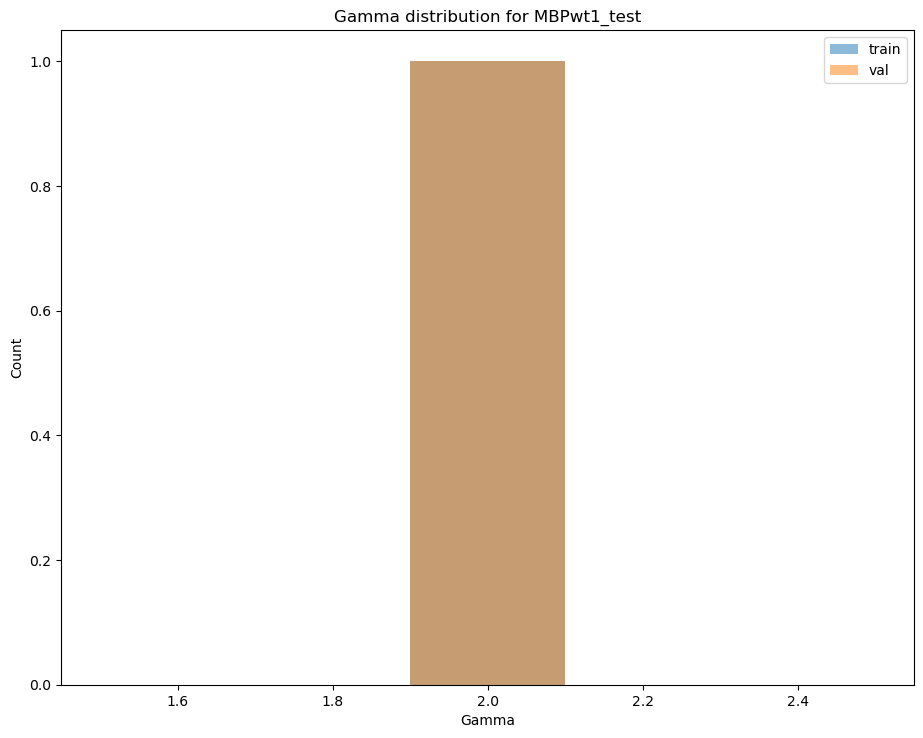

['train_MBPwt1_test_1']
['val_MBPwt1_test_1']
plotting dfracs compare for train
plot_dfracs_compare
           30       240      1800     14400  peptide           calc_name  \
0    0.394110  0.667680  0.902490  1.000000        0        Experimental   
1    0.376200  0.635670  0.869210  1.000000        1        Experimental   
2    0.151360  0.221100  0.462110  1.000000        2        Experimental   
3    0.362850  0.473370  0.693240  1.000000        3        Experimental   
4    0.127020  0.195950  0.460170  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
310  0.335407  0.634257  0.888733  0.961963      110  test_MBPwt1_test_1   
311  0.347857  0.631345  0.866590  0.940854      111  test_MBPwt1_test_1   
312  0.292709  0.569273  0.858424  0.951590      112  test_MBPwt1_test_1   
313  0.218670  0.487817  0.794292  0.912183      113  test_MBPwt1_test_1   
314  0.068037  0.363880  0.738668  0.890904      114  test_MBPwt

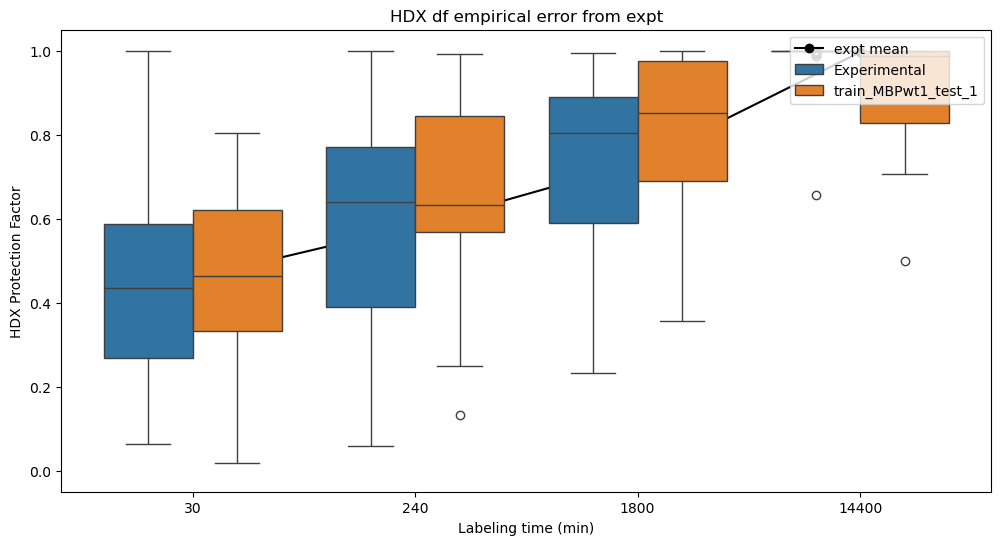

plotting dfracs compare for val
plot_dfracs_compare
           30       240      1800     14400  peptide           calc_name  \
0    0.394110  0.667680  0.902490  1.000000        0        Experimental   
1    0.376200  0.635670  0.869210  1.000000        1        Experimental   
2    0.151360  0.221100  0.462110  1.000000        2        Experimental   
3    0.362850  0.473370  0.693240  1.000000        3        Experimental   
4    0.127020  0.195950  0.460170  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
310  0.335407  0.634257  0.888733  0.961963      110  test_MBPwt1_test_1   
311  0.347857  0.631345  0.866590  0.940854      111  test_MBPwt1_test_1   
312  0.292709  0.569273  0.858424  0.951590      112  test_MBPwt1_test_1   
313  0.218670  0.487817  0.794292  0.912183      113  test_MBPwt1_test_1   
314  0.068037  0.363880  0.738668  0.890904      114  test_MBPwt1_test_1   

     ResStr  ResEnd path  
0       

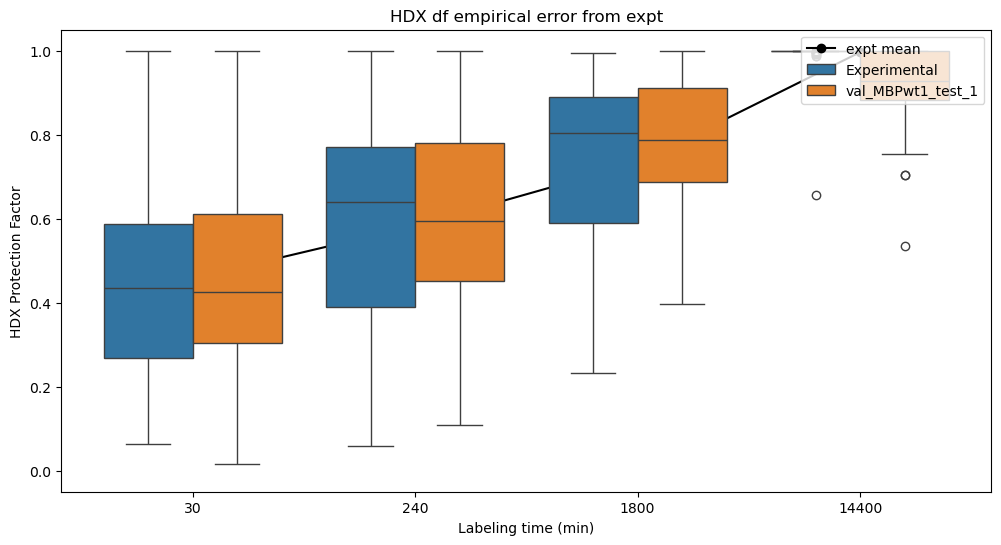

Restoring trainval peptide numbers
train_rep_names ['train_MBPwt1_test_1']
val_rep_names ['val_MBPwt1_test_1']
test_rep_names ['test_MBPwt1_test_1']
train_rep_peptides [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 97, 98, 99, 100, 101, 102, 104, 105]
val_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 29, 34, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 109]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113

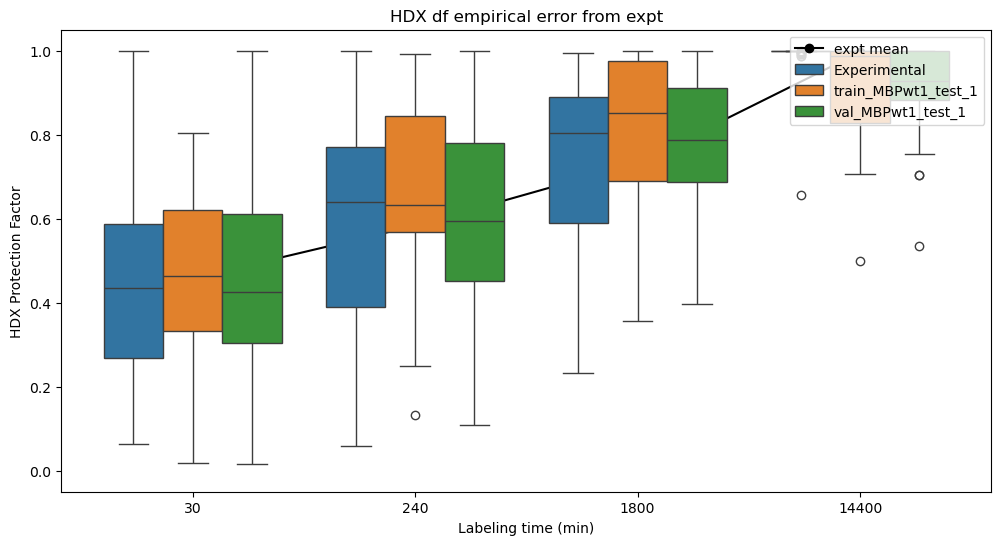

plotting dfracs compare abs for merge_df
plotting paired errors
           30       240      1800     14400  peptide          calc_name  \
0    0.394110  0.667680  0.902490  1.000000        0       Experimental   
1    0.376200  0.635670  0.869210  1.000000        1       Experimental   
2    0.151360  0.221100  0.462110  1.000000        2       Experimental   
3    0.362850  0.473370  0.693240  1.000000        3       Experimental   
4    0.127020  0.195950  0.460170  1.000000        4       Experimental   
..        ...       ...       ...       ...      ...                ...   
195  0.423833  0.564281  0.751683  0.837429       89  val_MBPwt1_test_1   
196  0.320651  0.504979  0.756676  0.883587       90  val_MBPwt1_test_1   
197  0.363572  0.526155  0.790013  0.909457       91  val_MBPwt1_test_1   
198  0.427215  0.573539  0.811011  0.918511       92  val_MBPwt1_test_1   
199  0.491966  0.872532  0.999868  1.000000      109  val_MBPwt1_test_1   

     ResStr  ResEnd                

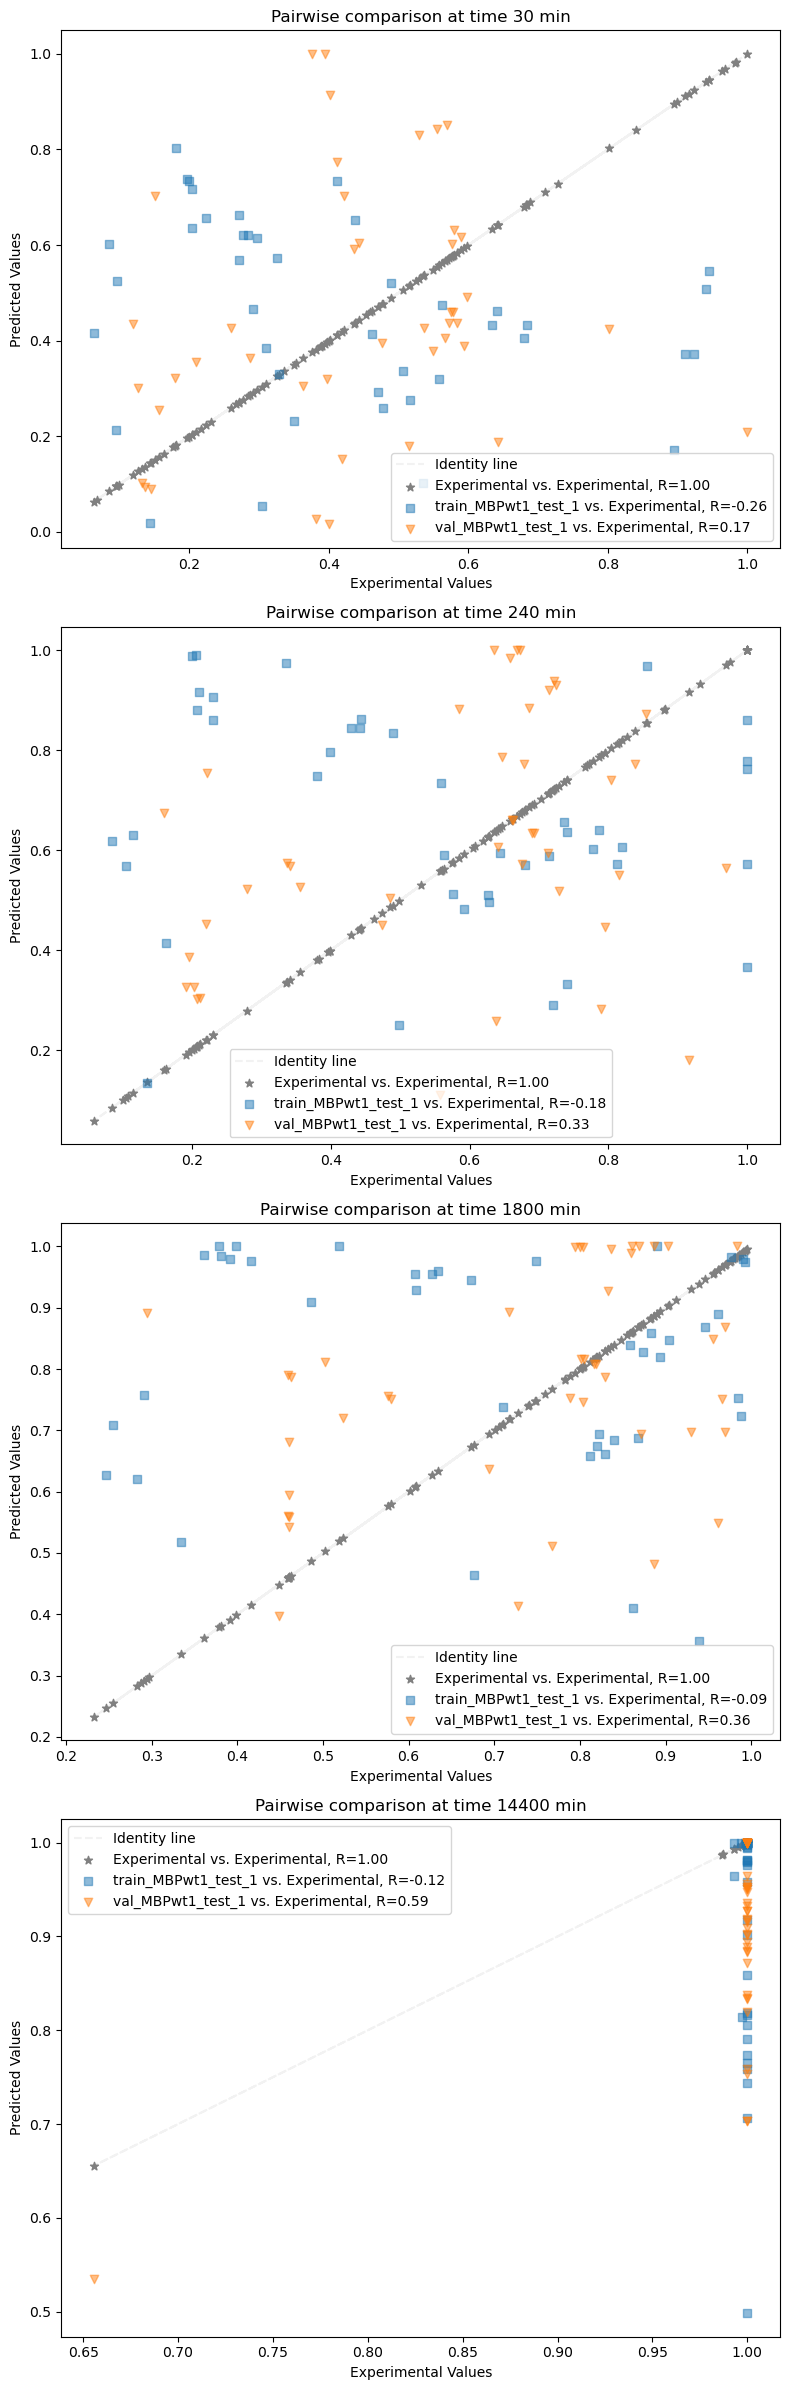

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


plotting R agreement
plotting paired trainval agreement
           30       240      1800     14400  peptide          calc_name  \
0    0.394110  0.667680  0.902490  1.000000        0       Experimental   
1    0.376200  0.635670  0.869210  1.000000        1       Experimental   
2    0.151360  0.221100  0.462110  1.000000        2       Experimental   
3    0.362850  0.473370  0.693240  1.000000        3       Experimental   
4    0.127020  0.195950  0.460170  1.000000        4       Experimental   
..        ...       ...       ...       ...      ...                ...   
195  0.423833  0.564281  0.751683  0.837429       89  val_MBPwt1_test_1   
196  0.320651  0.504979  0.756676  0.883587       90  val_MBPwt1_test_1   
197  0.363572  0.526155  0.790013  0.909457       91  val_MBPwt1_test_1   
198  0.427215  0.573539  0.811011  0.918511       92  val_MBPwt1_test_1   
199  0.491966  0.872532  0.999868  1.000000      109  val_MBPwt1_test_1   

     ResStr  ResEnd                        

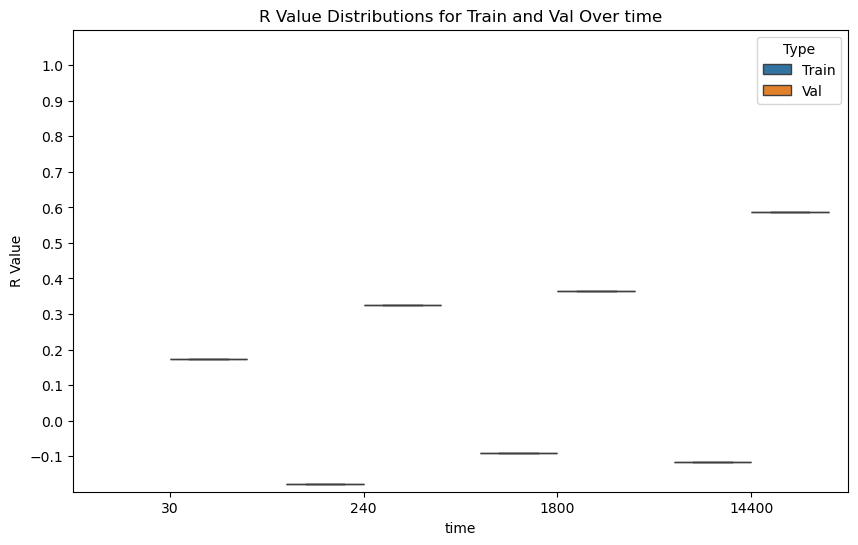

concat plot_df
nan_df
           30       240      1800     14400  peptide            calc_name  \
0    0.231350  0.333140  0.356860  0.498420       35  train_MBPwt1_test_1   
1    0.621740  0.844540  0.954750  0.999960       36  train_MBPwt1_test_1   
2    0.621740  0.844540  0.954750  0.999960       37  train_MBPwt1_test_1   
3    0.663650  0.861810  0.959780  0.999970       38  train_MBPwt1_test_1   
4    0.524670  0.630130  0.757200  0.917700       39  train_MBPwt1_test_1   
..        ...       ...       ...       ...      ...                  ...   
165  0.423833  0.564281  0.751683  0.837429       89    val_MBPwt1_test_1   
166  0.320651  0.504979  0.756676  0.883587       90    val_MBPwt1_test_1   
167  0.363572  0.526155  0.790013  0.909457       91    val_MBPwt1_test_1   
168  0.427215  0.573539  0.811011  0.918511       92    val_MBPwt1_test_1   
169  0.491966  0.872532  0.999868  1.000000      109    val_MBPwt1_test_1   

     ResStr  ResEnd                                  

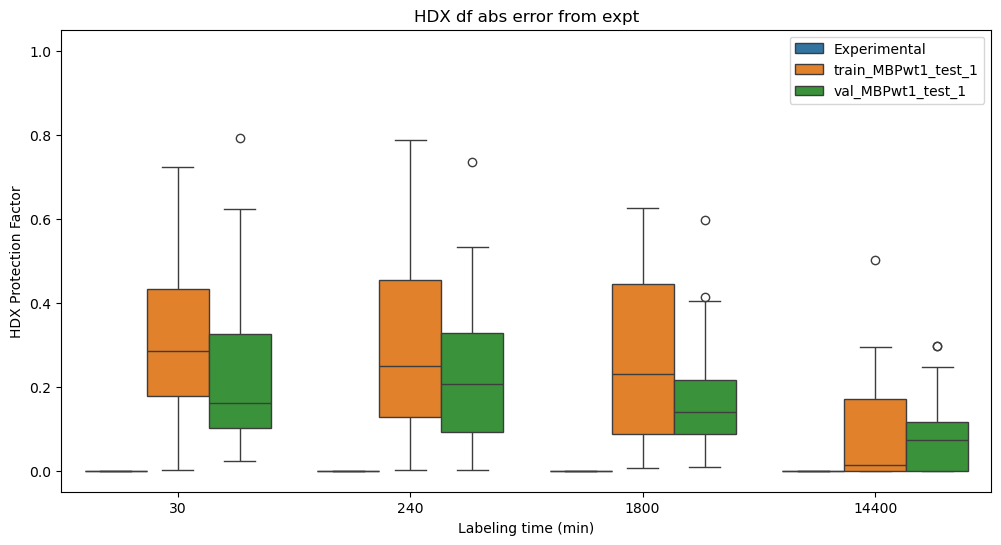

plotting MSE for nan_df
plot_dfracs_compare_MSE
          30      240     1800    14400  peptide            calc_name  ResStr  \
0    0.23135  0.33314  0.35686  0.49842       35  train_MBPwt1_test_1     NaN   
1    0.62174  0.84454  0.95475  0.99996       36  train_MBPwt1_test_1     NaN   
2    0.62174  0.84454  0.95475  0.99996       37  train_MBPwt1_test_1     NaN   
3    0.66365  0.86181  0.95978  0.99997       38  train_MBPwt1_test_1     NaN   
4    0.52467  0.63013  0.75720  0.91770       39  train_MBPwt1_test_1     NaN   
..       ...      ...      ...      ...      ...                  ...     ...   
280  0.89982  0.97542  0.99551  1.00000      110         Experimental     NaN   
281  0.96768  1.00000  0.98548  0.99509      111         Experimental     NaN   
282  0.96316  1.00000  0.97530  0.98655      112         Experimental     NaN   
283  0.94487  1.00000  0.99337  0.99643      113         Experimental     NaN   
284  0.91682  1.00000  0.98034  0.98742      114         Expe

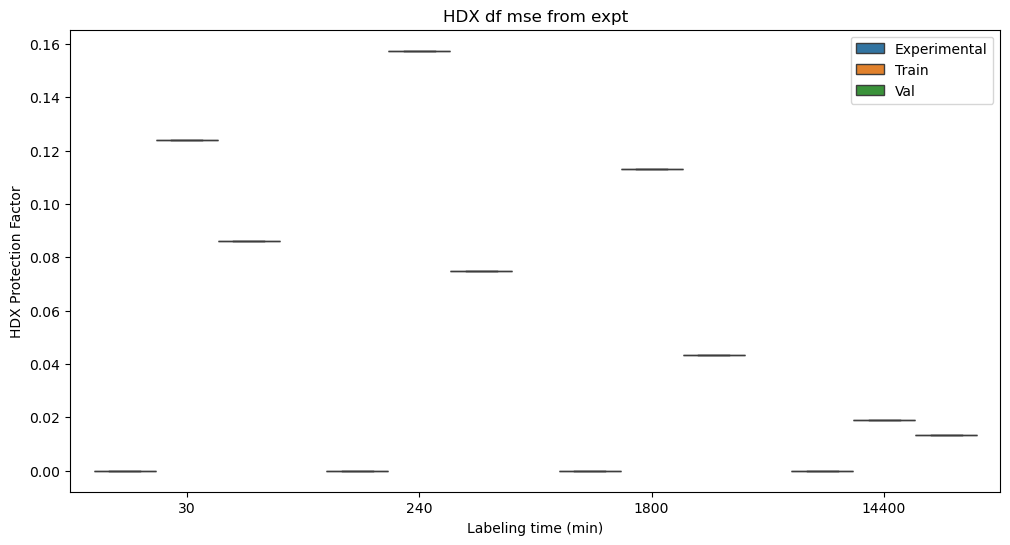

Saving experiment to:  logs/AvsB_S35_1709132733.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name LvsX_SR already exists. Attempting to cha

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_meth

/home/alexi/Documents/ValDX/data/LvsX_SR10/train_MBPwt1_test_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/LvsX_SR10/train_MBPwt1_test_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/LvsX_SR10/train_MBPwt1_test_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/LvsX_SR10/train_MBPwt1_test_1/reweighting_gamma_4x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds readHbonds read



Segments and experimental dfracs readSegments and experimental dfracs readSegments and experimental dfracs read


Segments and experimental dfracs read
Finished reweighting
[(array([0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 15

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_MBPwt1_test_1
    ResStr  ResEnd  peptide                                               path
0      108     114       24  /home/alexi/Documents/ValDX/data/LvsX_SR10/val...
1      115     120       25  /home/alexi/Documents/ValDX/data/LvsX_SR10/val...
2      115     121       26  /home/alexi/Documents/ValDX/data/LvsX_SR10/val...
3      115     123       27  /home/alexi/Documents/ValDX/data/LvsX_SR10/val...
4      117     124       28  /home/alexi/Documents/ValDX/data/LvsX_SR10/val...
5      122     126       29  /home/alexi/Documents/ValDX/data/LvsX_SR10/val...
6      130     133       34  /home/alexi/Documents/ValDX/data/LvsX_SR10/val...
7      147     158       36  /home/alexi/Documents/ValDX/data/LvsX_SR10/val...
8      147     159       37  /home/alexi/Documents/ValDX/data/LvsX_SR10/val...
9      147     160       38  /home/alexi/Documents/ValDX/data/LvsX_SR10/val...
10     162     168       39  /home/alexi/Documents/ValDX/data/LvsX_SR10/val...
11     163     168  

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(75,)
[ 1.14937001  0.70461112  0.54550538 15.69480419 12.48510269 12.06605782
 11.50992943 12.34029984 11.52326442  1.1114627  10.28148155 11.17433756
  9.89068888  2.04880959 12.14503685  4.86411351 12.01155823  0.09214618
 11.66999709  2.16166245 12.36408404 15.19352898 12.1195026   0.42141519
 11.92564801 11.59479082 12.37101524  0.98842135 12.481249   12.36505194
  1.12172615 13.64466118 13.02324234 12.49186604 13.81543876 13.70302042
  2.00309009 11.35530363  0.6646811   0.72655239 11.82717897  1.38526422
  0.99456443 13.04904327 13.98507464 13.36102476 12.86185319 12.57040457
 13.43605722 11.9787392   1.51330694 11.36775763 11.5388019   1.68688938
  4.9957492  11.73520063 12.49036477  2.08496088 12.59444949  1.56368019
  2.2459155   1.82940881  1.45038086  0.87697091 10.12904033  6.92303064
  2.14605001 13.17383467 13.06132943 13.17603119 13.2787075  13.73750857
 13.46028191 13.44878388 13.34522657]
LogPf_by_res [ 1.14937001  0.70461112  0.54550538 15.69480419

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar di

LogPf_by_res shape
(333,)
[3.29709509e-01 2.07549151e-01 1.02589413e-01 1.48048194e-01
 1.78763587e-01 2.29751140e-01 1.02107254e+00 1.15577977e+00
 1.33252662e+00 4.10711241e+00 1.52419067e+00 4.93903520e-01
 7.63458489e+00 5.51388338e+00 1.37215366e+01 1.28239399e+01
 1.40313215e+01 1.36532555e+01 1.32858994e+01 3.62381400e+00
 1.22185833e+00 7.11368502e-01 1.05633620e+01 2.15744920e+00
 2.86689385e+00 9.89411401e+00 1.19044889e+01 1.36706359e+01
 1.33872662e+01 1.28837076e+01 1.28592221e+01 1.37607654e+01
 1.35114433e+01 1.30857279e+01 1.38860842e+01 1.40802055e+01
 1.29719941e+01 1.37262832e+01 1.32551031e+01 1.25500515e+01
 1.43186472e+00 4.19056541e+00 2.14297250e+00 1.27726047e+01
 1.30171836e+00 1.27685653e+01 1.69733262e+00 2.38351450e-01
 1.04696037e+00 1.98992294e+00 1.51971074e+00 1.13408210e+01
 1.20660578e+01 1.29227566e+01 8.29742904e+00 1.36829280e+01
 1.31355678e+01 3.57283242e+00 7.28951768e+00 7.06204400e+00
 5.71388703e+00 2.92709602e+00 1.21284505e+01 1.23895314e+0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning

Finished running VDX loop
Evaluating HDX
plotting gamma distributions


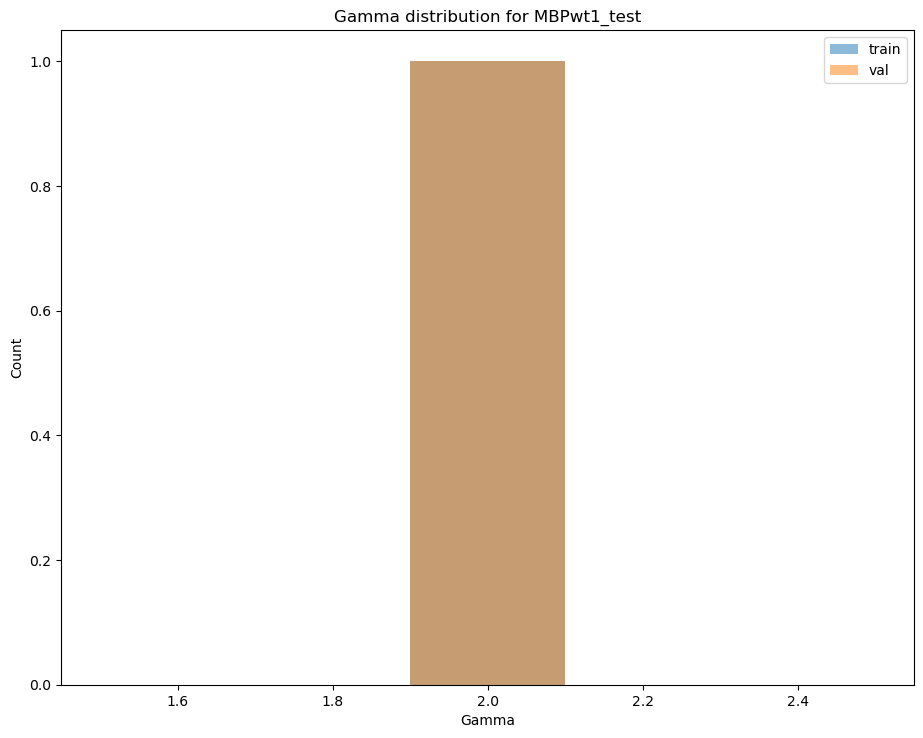

['train_MBPwt1_test_1']
['val_MBPwt1_test_1']
plotting dfracs compare for train
plot_dfracs_compare
           30       240      1800     14400  peptide           calc_name  \
0    0.394110  0.667680  0.902490  1.000000        0        Experimental   
1    0.376200  0.635670  0.869210  1.000000        1        Experimental   
2    0.151360  0.221100  0.462110  1.000000        2        Experimental   
3    0.362850  0.473370  0.693240  1.000000        3        Experimental   
4    0.127020  0.195950  0.460170  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
266  0.450101  0.611932  0.924451  0.998605      110  test_MBPwt1_test_1   
267  0.348328  0.507498  0.883884  0.997830      111  test_MBPwt1_test_1   
268  0.300129  0.506096  0.903846  0.998224      112  test_MBPwt1_test_1   
269  0.218158  0.426801  0.858153  0.997733      113  test_MBPwt1_test_1   
270  0.050214  0.321997  0.839585  0.997906      114  test_MBPwt

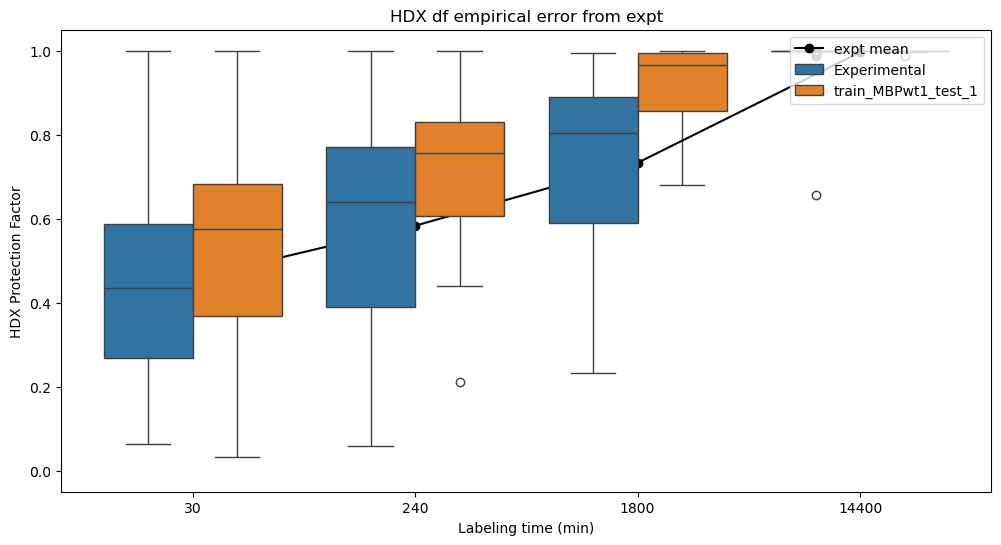

plotting dfracs compare for val
plot_dfracs_compare
           30       240      1800     14400  peptide           calc_name  \
0    0.394110  0.667680  0.902490  1.000000        0        Experimental   
1    0.376200  0.635670  0.869210  1.000000        1        Experimental   
2    0.151360  0.221100  0.462110  1.000000        2        Experimental   
3    0.362850  0.473370  0.693240  1.000000        3        Experimental   
4    0.127020  0.195950  0.460170  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
266  0.450101  0.611932  0.924451  0.998605      110  test_MBPwt1_test_1   
267  0.348328  0.507498  0.883884  0.997830      111  test_MBPwt1_test_1   
268  0.300129  0.506096  0.903846  0.998224      112  test_MBPwt1_test_1   
269  0.218158  0.426801  0.858153  0.997733      113  test_MBPwt1_test_1   
270  0.050214  0.321997  0.839585  0.997906      114  test_MBPwt1_test_1   

     ResStr  ResEnd path  
0       

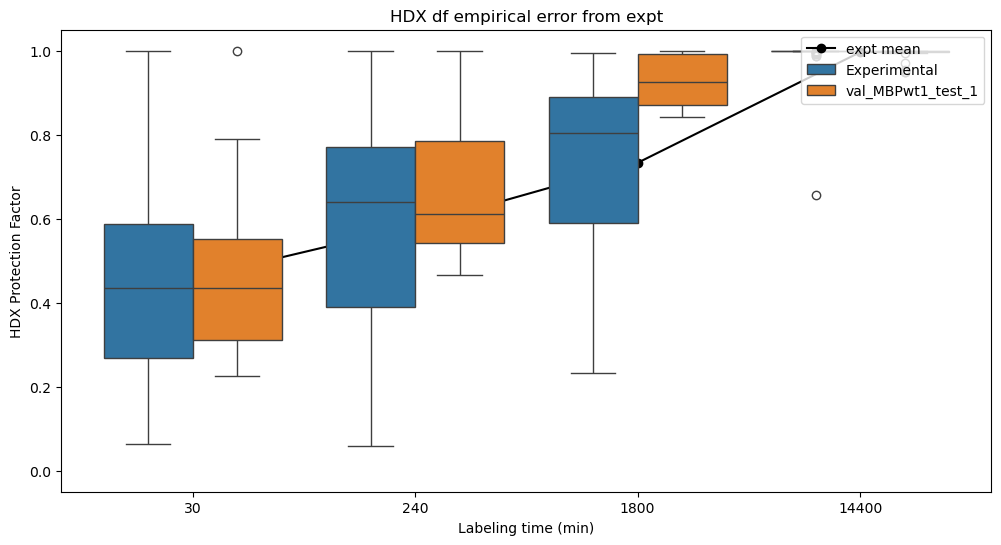

Restoring trainval peptide numbers
train_rep_names ['train_MBPwt1_test_1']
val_rep_names ['val_MBPwt1_test_1']
test_rep_names ['test_MBPwt1_test_1']
train_rep_peptides [0, 1, 2, 7, 8, 9, 11, 21, 58, 59, 67, 79, 81, 82, 83, 102]
val_rep_peptides [24, 25, 26, 27, 28, 29, 34, 36, 37, 38, 39, 40, 51, 89, 90, 91, 92, 93, 94, 95, 96, 109, 110, 111, 112]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]
manual merge df
          30       240      1800     14400  peptide            calc_name  \
0   0.999110  1.000000  1.000000  1.000000        0  train_MBPwt1_test_1  

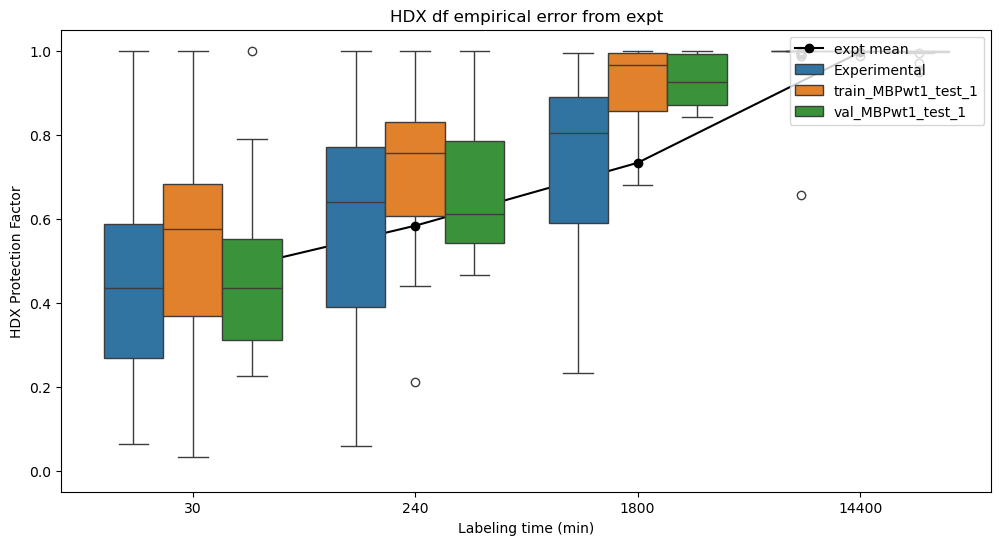

plotting dfracs compare abs for merge_df
plotting paired errors
           30       240      1800     14400  peptide          calc_name  \
0    0.394110  0.667680  0.902490  1.000000        0       Experimental   
1    0.376200  0.635670  0.869210  1.000000        1       Experimental   
2    0.151360  0.221100  0.462110  1.000000        2       Experimental   
3    0.362850  0.473370  0.693240  1.000000        3       Experimental   
4    0.127020  0.195950  0.460170  1.000000        4       Experimental   
..        ...       ...       ...       ...      ...                ...   
151  0.551444  0.762951  0.992432  1.000000       96  val_MBPwt1_test_1   
152  1.000000  1.000000  1.000000  1.000000      109  val_MBPwt1_test_1   
153  0.450101  0.611932  0.924451  0.998605      110  val_MBPwt1_test_1   
154  0.348328  0.507498  0.883884  0.997830      111  val_MBPwt1_test_1   
155  0.300129  0.506096  0.903846  0.998224      112  val_MBPwt1_test_1   

     ResStr  ResEnd                

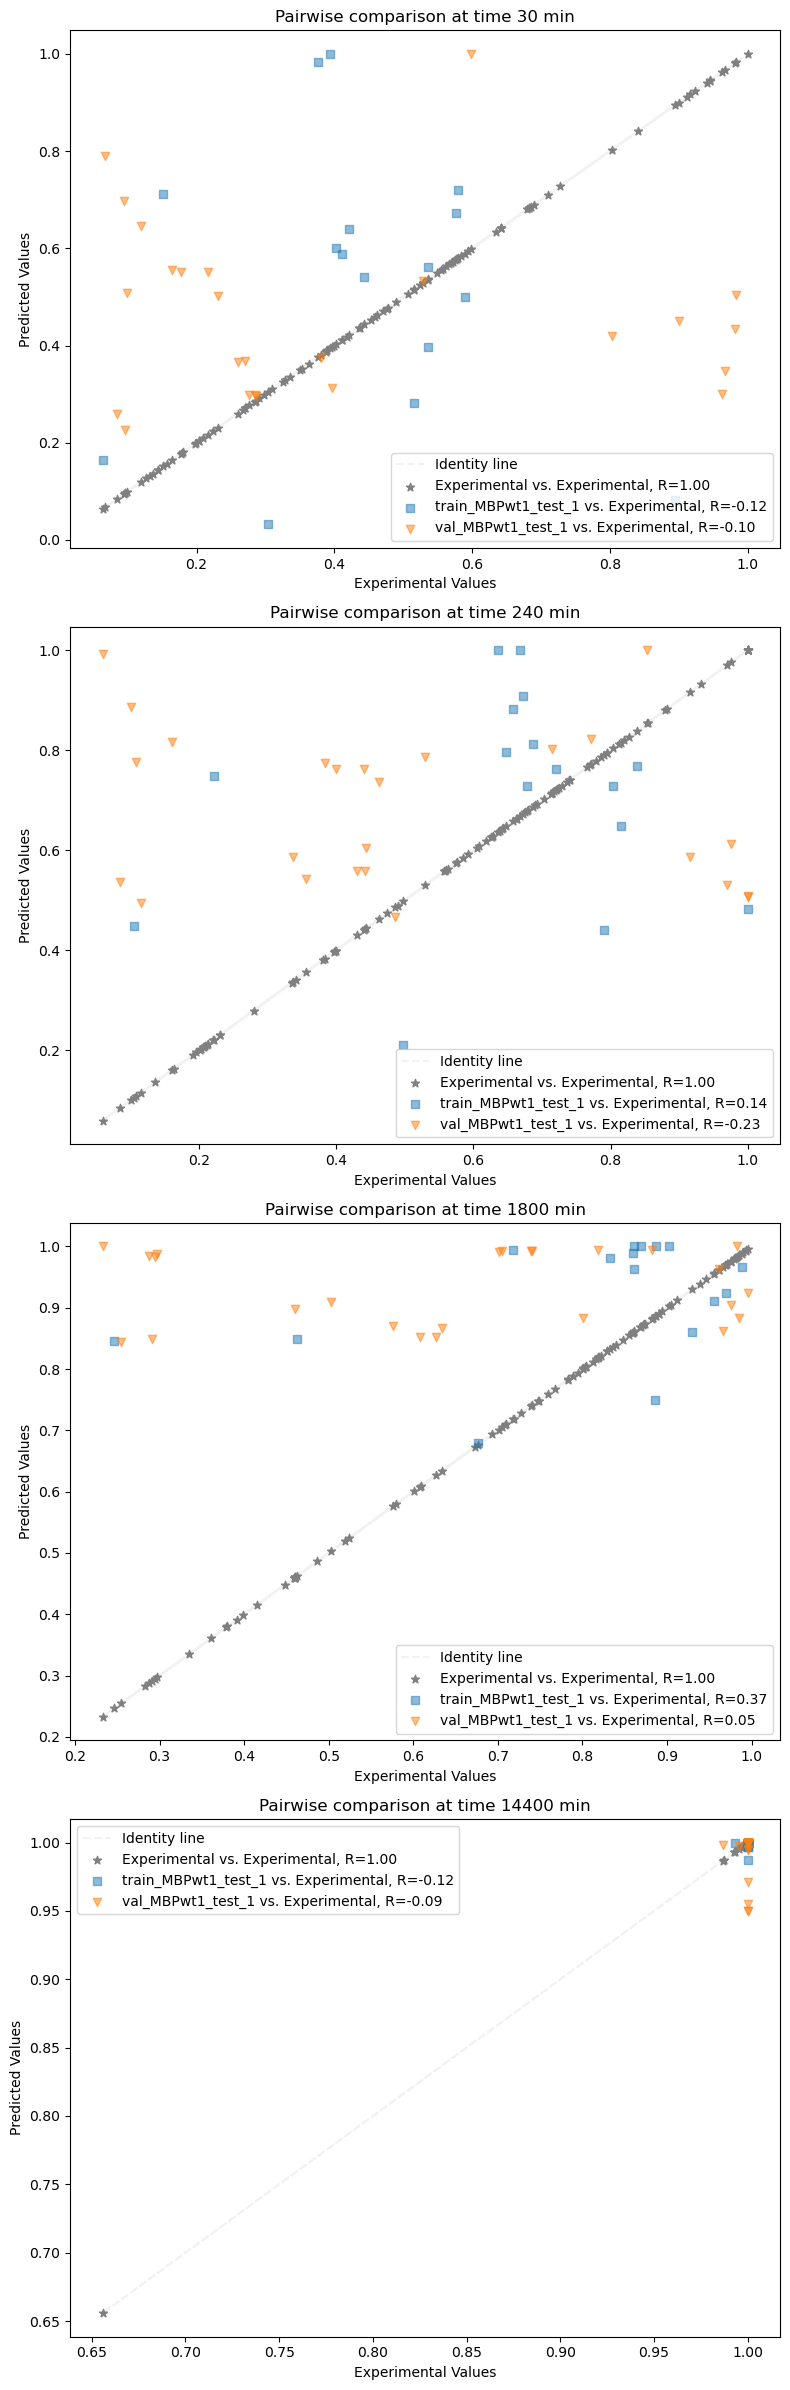

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


plotting R agreement
plotting paired trainval agreement
           30       240      1800     14400  peptide          calc_name  \
0    0.394110  0.667680  0.902490  1.000000        0       Experimental   
1    0.376200  0.635670  0.869210  1.000000        1       Experimental   
2    0.151360  0.221100  0.462110  1.000000        2       Experimental   
3    0.362850  0.473370  0.693240  1.000000        3       Experimental   
4    0.127020  0.195950  0.460170  1.000000        4       Experimental   
..        ...       ...       ...       ...      ...                ...   
151  0.551444  0.762951  0.992432  1.000000       96  val_MBPwt1_test_1   
152  1.000000  1.000000  1.000000  1.000000      109  val_MBPwt1_test_1   
153  0.450101  0.611932  0.924451  0.998605      110  val_MBPwt1_test_1   
154  0.348328  0.507498  0.883884  0.997830      111  val_MBPwt1_test_1   
155  0.300129  0.506096  0.903846  0.998224      112  val_MBPwt1_test_1   

     ResStr  ResEnd                        

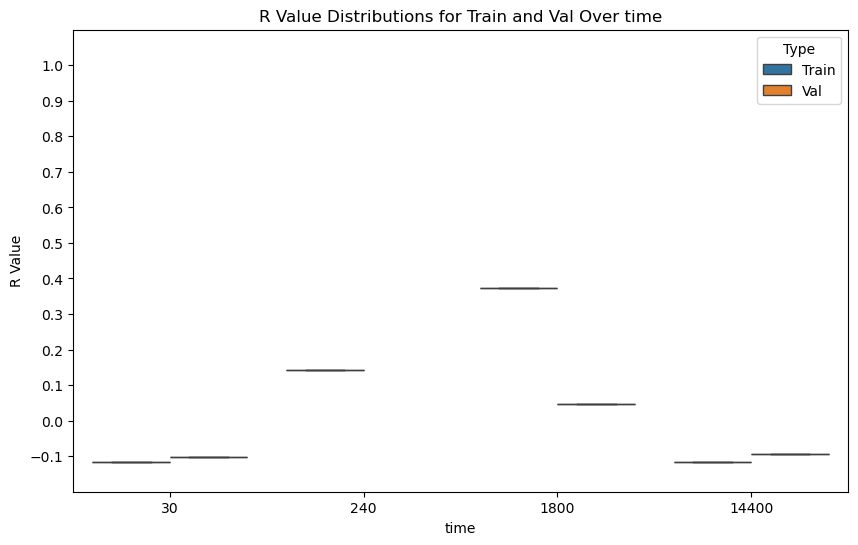

concat plot_df
nan_df
          30       240      1800     14400  peptide            calc_name  \
0   0.999110  1.000000  1.000000  1.000000        0  train_MBPwt1_test_1   
1   0.982600  1.000000  1.000000  1.000000        1  train_MBPwt1_test_1   
2   0.711910  0.748890  0.848250  0.987190        2  train_MBPwt1_test_1   
3   0.673640  0.729180  0.911290  0.999770        7  train_MBPwt1_test_1   
4   0.720260  0.767870  0.923960  0.999800        8  train_MBPwt1_test_1   
..       ...       ...       ...       ...      ...                  ...   
77  0.551444  0.762951  0.992432  1.000000       96    val_MBPwt1_test_1   
78  1.000000  1.000000  1.000000  1.000000      109    val_MBPwt1_test_1   
79  0.450101  0.611932  0.924451  0.998605      110    val_MBPwt1_test_1   
80  0.348328  0.507498  0.883884  0.997830      111    val_MBPwt1_test_1   
81  0.300129  0.506096  0.903846  0.998224      112    val_MBPwt1_test_1   

    ResStr  ResEnd                                               

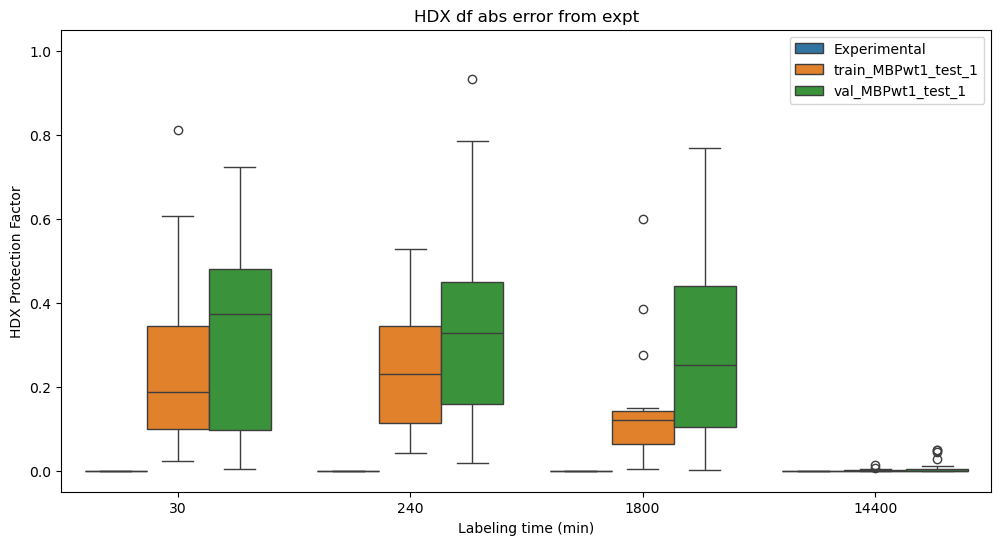

plotting MSE for nan_df
plot_dfracs_compare_MSE
          30      240     1800    14400  peptide            calc_name  ResStr  \
0    0.99911  1.00000  1.00000  1.00000        0  train_MBPwt1_test_1     NaN   
1    0.98260  1.00000  1.00000  1.00000        1  train_MBPwt1_test_1     NaN   
2    0.71191  0.74889  0.84825  0.98719        2  train_MBPwt1_test_1     NaN   
3    0.67364  0.72918  0.91129  0.99977        7  train_MBPwt1_test_1     NaN   
4    0.72026  0.76787  0.92396  0.99980        8  train_MBPwt1_test_1     NaN   
..       ...      ...      ...      ...      ...                  ...     ...   
192  0.89982  0.97542  0.99551  1.00000      110         Experimental     NaN   
193  0.96768  1.00000  0.98548  0.99509      111         Experimental     NaN   
194  0.96316  1.00000  0.97530  0.98655      112         Experimental     NaN   
195  0.94487  1.00000  0.99337  0.99643      113         Experimental     NaN   
196  0.91682  1.00000  0.98034  0.98742      114         Expe

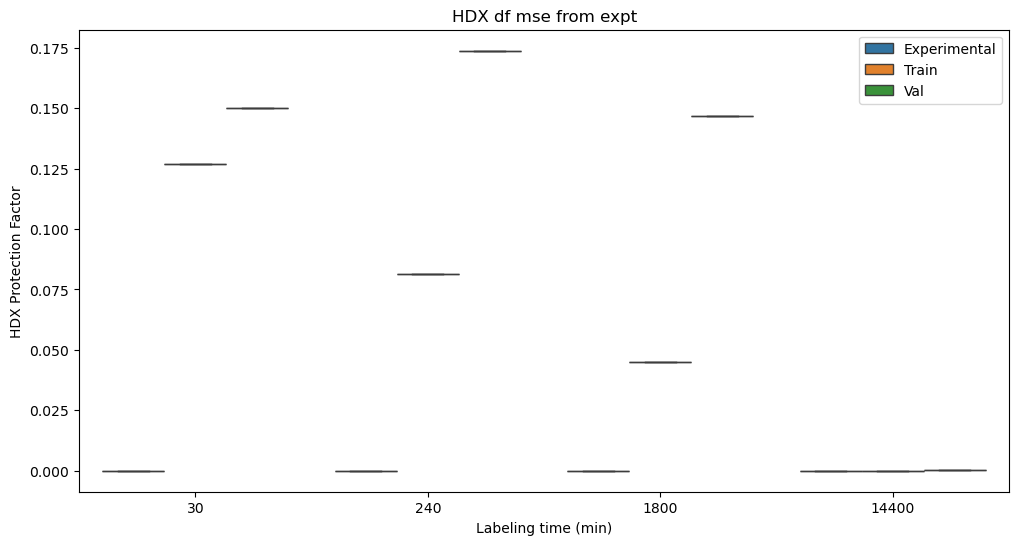

Saving experiment to:  logs/LvsX_SR10_1709132784.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name mixAandB_Sp already exists. Attempting to

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_meth

/home/alexi/Documents/ValDX/data/mixAandB_Sp9/train_MBPwt1_test_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/mixAandB_Sp9/train_MBPwt1_test_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/mixAandB_Sp9/train_MBPwt1_test_1/reweighting_gamma_5x10^0/home/alexi/Documents/ValDX/data/mixAandB_Sp9/train_MBPwt1_test_1/reweighting_gamma_3x10^0



Contacts readContacts readContacts readContacts read



Hbonds readHbonds readHbonds readHbonds read



Segments and experimental dfracs read
Segments and experimental dfracs readSegments and experimental dfracs read

Segments and experimental dfracs read
Finished reweighting
[(array([0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.00909091, 0.00909091, 0.00909091,
       0.00909091, 0.0

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 15

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar di

Recalculating val_MBPwt1_test_1
    ResStr  ResEnd  peptide                                               path
0       19      30        0  /home/alexi/Documents/ValDX/data/mixAandB_Sp9/...
1       19      31        1  /home/alexi/Documents/ValDX/data/mixAandB_Sp9/...
2       47      54        5  /home/alexi/Documents/ValDX/data/mixAandB_Sp9/...
3      147     158       36  /home/alexi/Documents/ValDX/data/mixAandB_Sp9/...
4      147     159       37  /home/alexi/Documents/ValDX/data/mixAandB_Sp9/...
5      147     160       38  /home/alexi/Documents/ValDX/data/mixAandB_Sp9/...
6      162     168       39  /home/alexi/Documents/ValDX/data/mixAandB_Sp9/...
7      163     168       40  /home/alexi/Documents/ValDX/data/mixAandB_Sp9/...
8      174     179       42  /home/alexi/Documents/ValDX/data/mixAandB_Sp9/...
9      221     225       58  /home/alexi/Documents/ValDX/data/mixAandB_Sp9/...
10     222     227       59  /home/alexi/Documents/ValDX/data/mixAandB_Sp9/...
11     225     235  

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(92,)
[ 0.74953723  0.62232415  0.59484568  0.85842999  1.0365275   1.33216936
  2.43383311  4.37713021  4.23974185  6.38099652  5.3510703   2.86380794
  7.07661402 13.70135888 11.94378975 12.38292675 15.86702459 15.00248782
 12.53405635 16.59366242 17.71923868  9.06575008 11.58046682  2.44349782
  8.1319925  12.02468945 14.78214945  5.73117783  9.02909738 11.84201688
  6.50412101 15.19381601 13.33396744 10.25288055 16.18403815 15.53220127
  6.38454642  7.1494008  13.79294443  9.73837177 12.14981204 11.79570751
  7.15036169  9.75923692 13.00524689 13.56651133 13.32073677 16.62011976
 15.08389407 10.97900781  8.90798706  8.36504294 12.2679232   9.07738075
  8.27339312  4.75876543  2.85668404 12.02265118 11.856715    6.84250628
  4.39544651  9.37561966 16.19420942 14.7658674  11.68274625 15.57697491
 15.99372308 11.8216623   9.72926985  7.95994151  5.98102491 10.55205624
 12.30557695  7.51677617 11.04008358  7.35445015  5.52102277  6.16573575
  8.08104781 13.76852135 1

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

LogPf_by_res shape
(333,)
[ 0.74953723  0.62232415  0.59484568  0.85842999  1.0365275   1.33216936
  2.43383311  4.37713021  4.23974185  6.38099652  5.3510703   2.86380794
  7.07661402 10.47011934 16.22067478 14.50279366 19.17912768 19.31142639
 17.18138019 12.87645791  7.08471889  4.1247383  10.11191819 12.509569
 11.97426337  8.55585252 14.40152734 16.50664792 13.70135888 11.94378975
 12.38292675 15.86702459 15.00248782 12.53405635 16.59366242 17.71923868
 11.29348057 11.0181973  12.35392459  9.4280358   7.72129085 10.35154982
 10.10118413 11.88069177  7.54777241 13.60060314  9.84166833  1.38203667
  3.16505002  8.63264354  8.23064972  8.80875901 11.27057715 14.49465263
  6.85221517 12.51014385 17.4719324   8.51307296  6.23802803  7.82461954
  9.88647008 12.32333449 13.95679414 15.47062296 17.34573645 14.2239404
 14.42951638  8.76595937 14.88646313  8.89775153 10.55053658 13.57922742
 15.57848654 13.66262373 11.9051028  17.25668769 10.68590675  8.30347266
  7.71269549 11.1855969  10.

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/core/universe.py:817: DeprecationWarning

Finished running VDX loop
Evaluating HDX
plotting gamma distributions


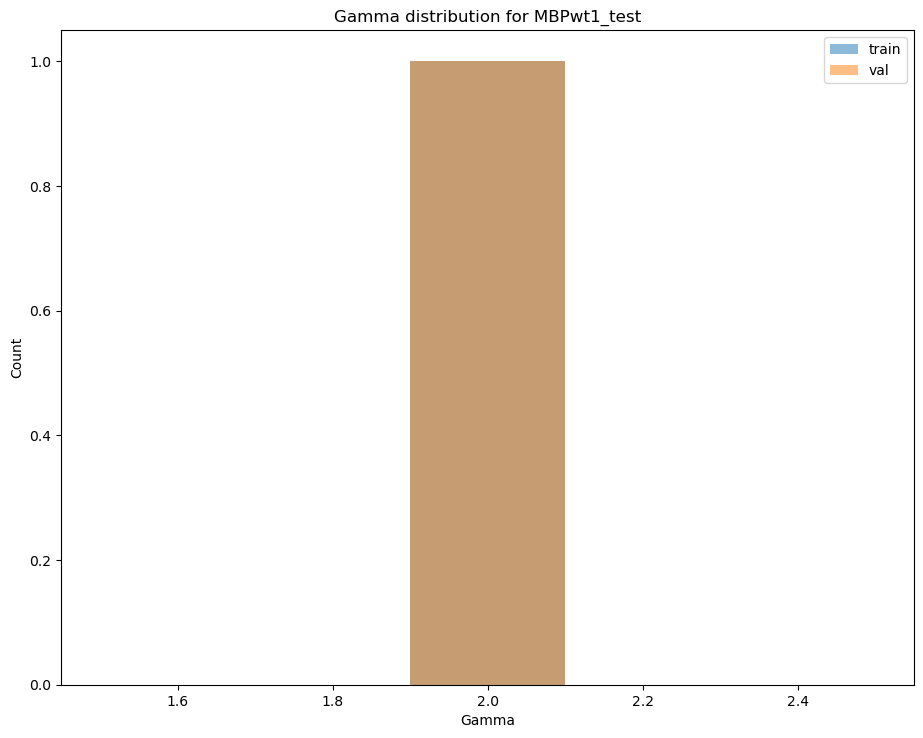

['train_MBPwt1_test_1']
['val_MBPwt1_test_1']
plotting dfracs compare for train
plot_dfracs_compare
           30       240      1800     14400  peptide           calc_name  \
0    0.394110  0.667680  0.902490  1.000000        0        Experimental   
1    0.376200  0.635670  0.869210  1.000000        1        Experimental   
2    0.151360  0.221100  0.462110  1.000000        2        Experimental   
3    0.362850  0.473370  0.693240  1.000000        3        Experimental   
4    0.127020  0.195950  0.460170  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
279  0.381078  0.513005  0.780294  0.944457      110  test_MBPwt1_test_1   
280  0.280943  0.438340  0.752262  0.915543      111  test_MBPwt1_test_1   
281  0.232742  0.380188  0.720374  0.929309      112  test_MBPwt1_test_1   
282  0.164342  0.293005  0.633694  0.886023      113  test_MBPwt1_test_1   
283  0.017939  0.129580  0.536873  0.867061      114  test_MBPwt

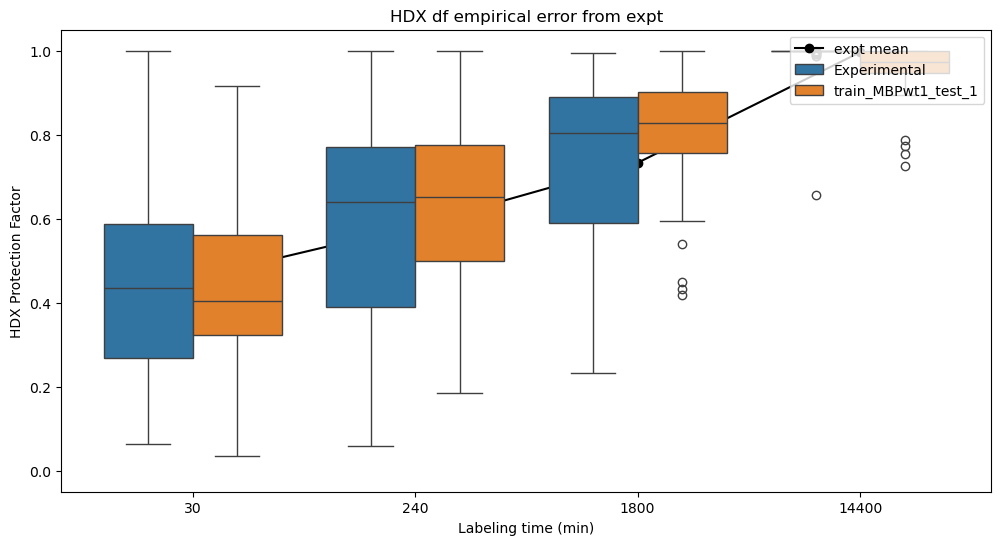

plotting dfracs compare for val
plot_dfracs_compare
           30       240      1800     14400  peptide           calc_name  \
0    0.394110  0.667680  0.902490  1.000000        0        Experimental   
1    0.376200  0.635670  0.869210  1.000000        1        Experimental   
2    0.151360  0.221100  0.462110  1.000000        2        Experimental   
3    0.362850  0.473370  0.693240  1.000000        3        Experimental   
4    0.127020  0.195950  0.460170  1.000000        4        Experimental   
..        ...       ...       ...       ...      ...                 ...   
279  0.381078  0.513005  0.780294  0.944457      110  test_MBPwt1_test_1   
280  0.280943  0.438340  0.752262  0.915543      111  test_MBPwt1_test_1   
281  0.232742  0.380188  0.720374  0.929309      112  test_MBPwt1_test_1   
282  0.164342  0.293005  0.633694  0.886023      113  test_MBPwt1_test_1   
283  0.017939  0.129580  0.536873  0.867061      114  test_MBPwt1_test_1   

     ResStr  ResEnd path  
0       

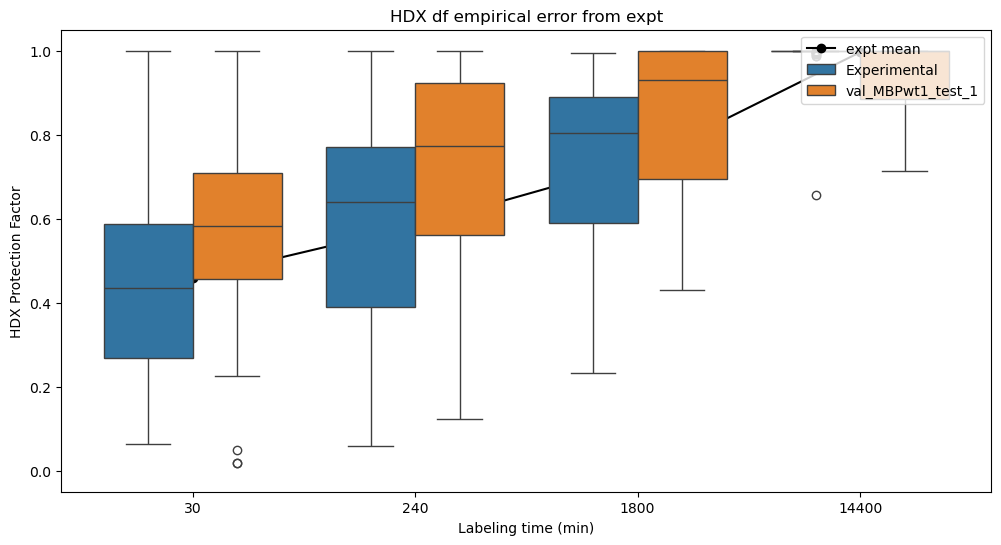

Restoring trainval peptide numbers
train_rep_names ['train_MBPwt1_test_1']
val_rep_names ['val_MBPwt1_test_1']
test_rep_names ['test_MBPwt1_test_1']
train_rep_peptides [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 49, 50, 51, 52, 78, 86, 87, 88, 103, 104, 105, 106, 109]
val_rep_peptides [0, 1, 5, 36, 37, 38, 39, 40, 42, 58, 59, 60, 61, 62, 63, 64, 65, 66, 72, 73, 74, 114]
test_rep_peptides [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]
manual merge df
          30       240      1800     14400  peptide            calc_name  \
0   0.357030  0.57

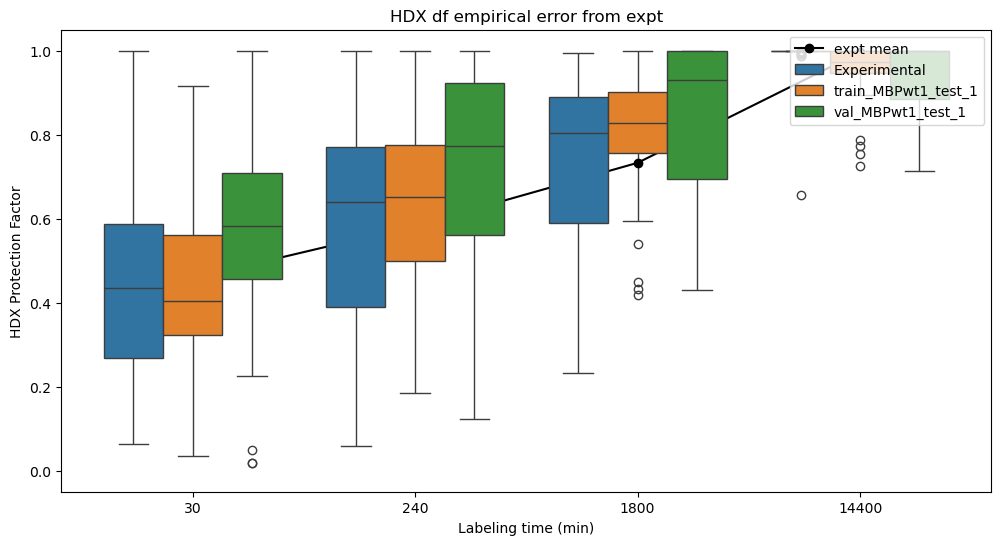

plotting dfracs compare abs for merge_df
plotting paired errors
           30       240      1800     14400  peptide          calc_name  \
0    0.394110  0.667680  0.902490  1.000000        0       Experimental   
1    0.376200  0.635670  0.869210  1.000000        1       Experimental   
2    0.151360  0.221100  0.462110  1.000000        2       Experimental   
3    0.362850  0.473370  0.693240  1.000000        3       Experimental   
4    0.127020  0.195950  0.460170  1.000000        4       Experimental   
..        ...       ...       ...       ...      ...                ...   
164  0.453863  0.601118  0.707492  0.927827       66  val_MBPwt1_test_1   
165  0.773536  0.984870  1.000000  1.000000       72  val_MBPwt1_test_1   
166  0.624582  0.792219  0.947013  0.998227       73  val_MBPwt1_test_1   
167  0.587344  0.744056  0.933766  0.997783       74  val_MBPwt1_test_1   
168  0.017939  0.129580  0.536873  0.867061      114  val_MBPwt1_test_1   

     ResStr  ResEnd                

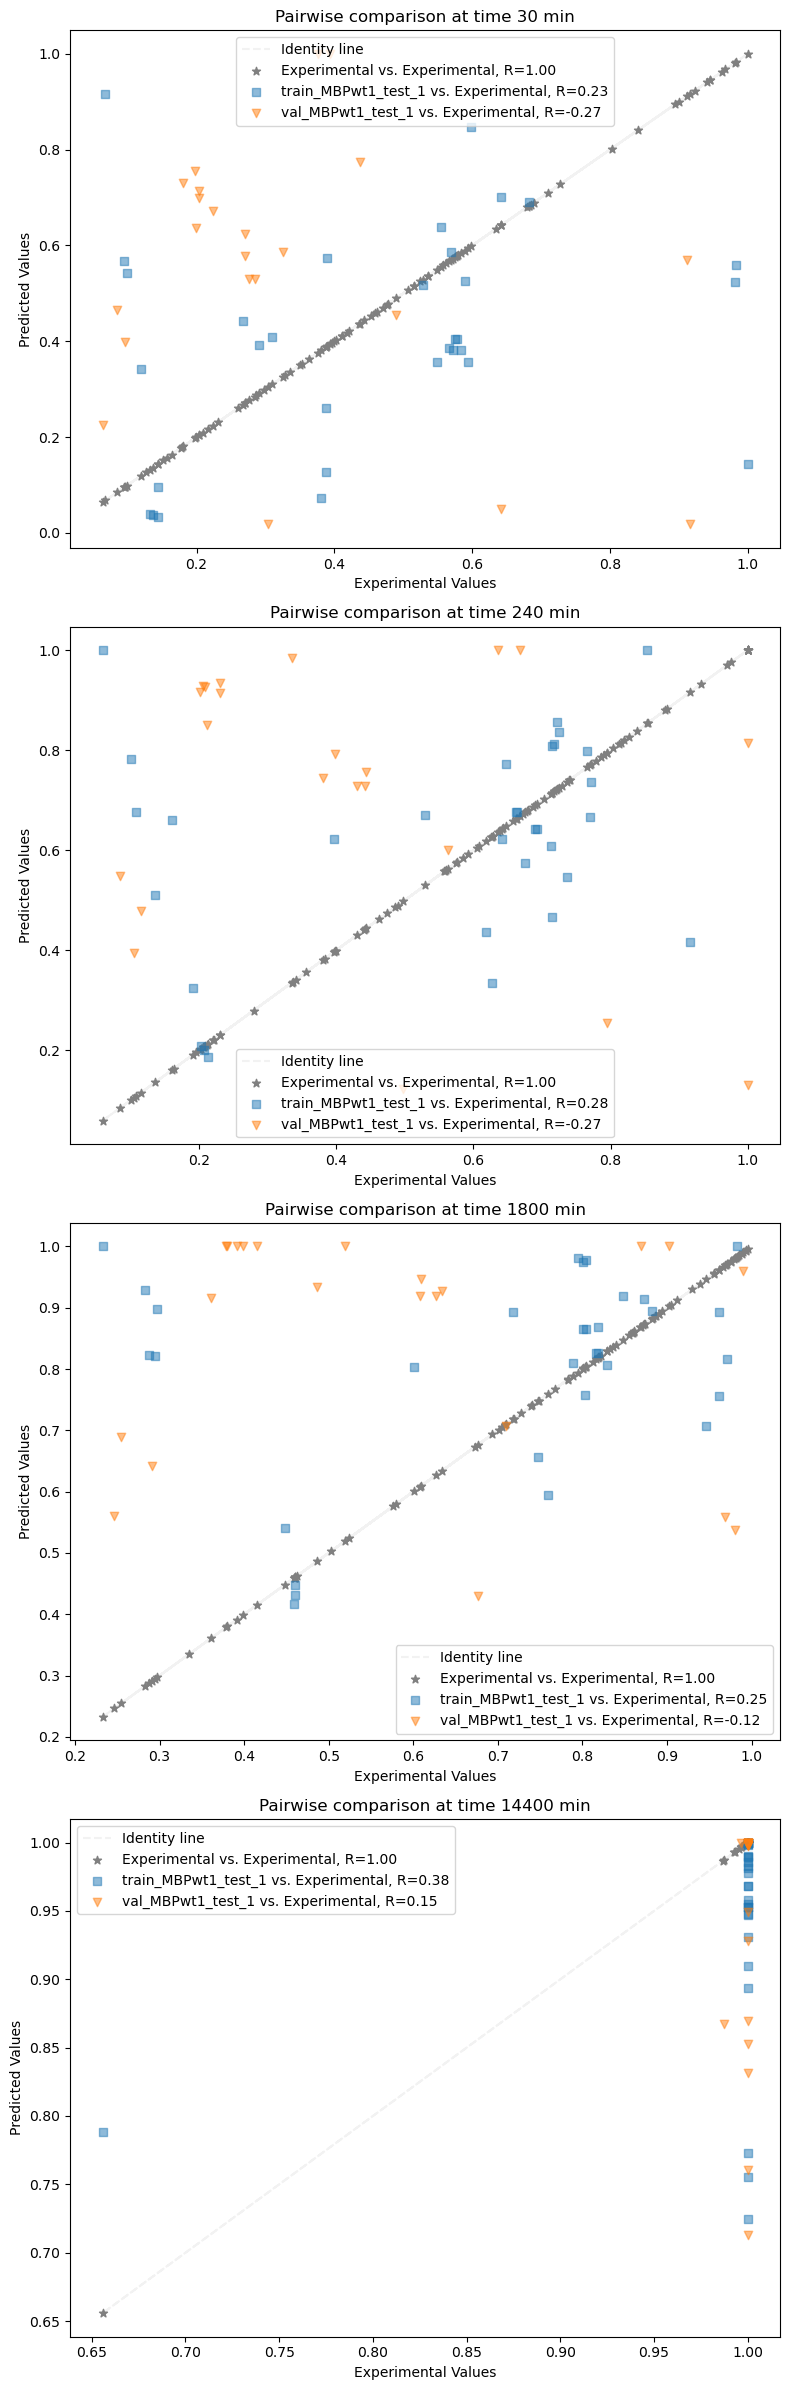

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


plotting R agreement
plotting paired trainval agreement
           30       240      1800     14400  peptide          calc_name  \
0    0.394110  0.667680  0.902490  1.000000        0       Experimental   
1    0.376200  0.635670  0.869210  1.000000        1       Experimental   
2    0.151360  0.221100  0.462110  1.000000        2       Experimental   
3    0.362850  0.473370  0.693240  1.000000        3       Experimental   
4    0.127020  0.195950  0.460170  1.000000        4       Experimental   
..        ...       ...       ...       ...      ...                ...   
164  0.453863  0.601118  0.707492  0.927827       66  val_MBPwt1_test_1   
165  0.773536  0.984870  1.000000  1.000000       72  val_MBPwt1_test_1   
166  0.624582  0.792219  0.947013  0.998227       73  val_MBPwt1_test_1   
167  0.587344  0.744056  0.933766  0.997783       74  val_MBPwt1_test_1   
168  0.017939  0.129580  0.536873  0.867061      114  val_MBPwt1_test_1   

     ResStr  ResEnd                        

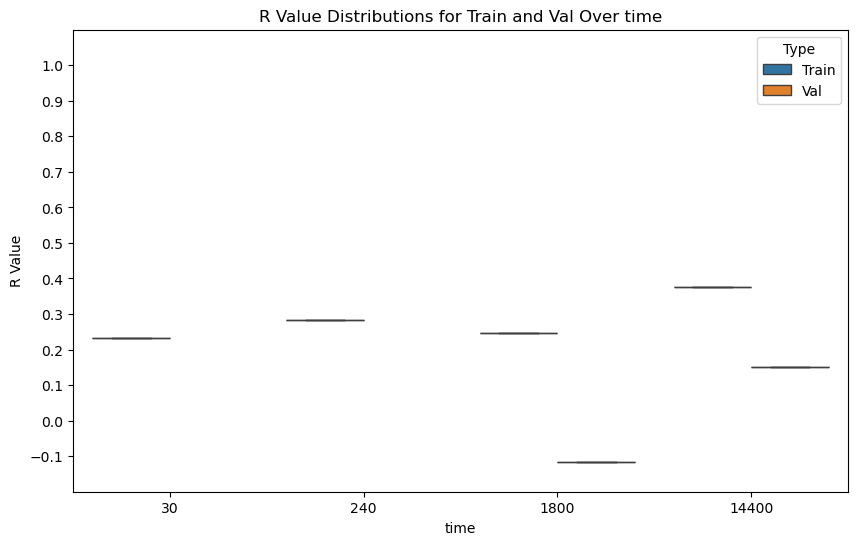

concat plot_df
nan_df
           30       240      1800     14400  peptide            calc_name  \
0    0.357030  0.575250  0.757940  0.930830       14  train_MBPwt1_test_1   
1    0.356520  0.608190  0.806420  0.947110       15  train_MBPwt1_test_1   
2    0.382760  0.641580  0.826790  0.952670       16  train_MBPwt1_test_1   
3    0.382760  0.641580  0.826790  0.952670       17  train_MBPwt1_test_1   
4    0.386590  0.621670  0.810350  0.952670       18  train_MBPwt1_test_1   
..        ...       ...       ...       ...      ...                  ...   
103  0.453863  0.601118  0.707492  0.927827       66    val_MBPwt1_test_1   
104  0.773536  0.984870  1.000000  1.000000       72    val_MBPwt1_test_1   
105  0.624582  0.792219  0.947013  0.998227       73    val_MBPwt1_test_1   
106  0.587344  0.744056  0.933766  0.997783       74    val_MBPwt1_test_1   
107  0.017939  0.129580  0.536873  0.867061      114    val_MBPwt1_test_1   

     ResStr  ResEnd                                  

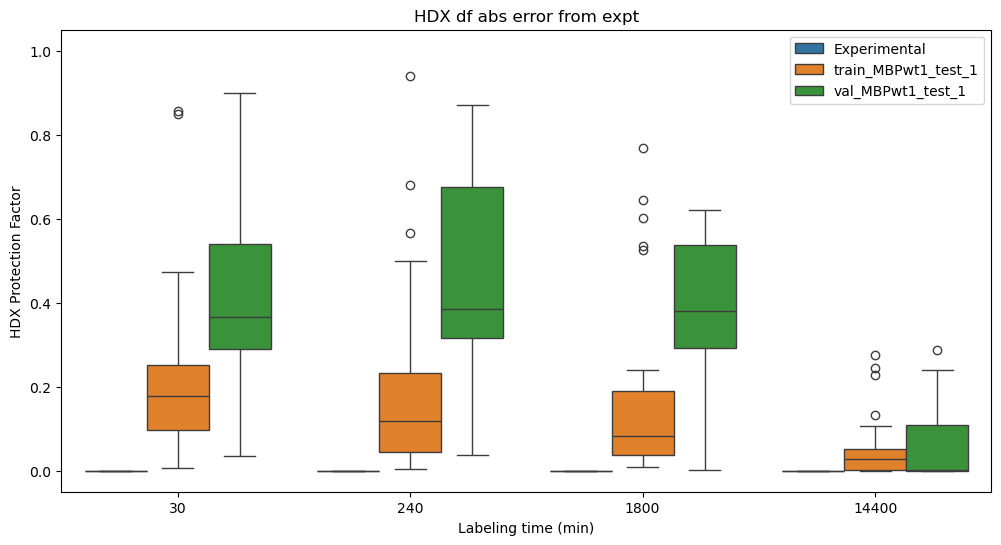

plotting MSE for nan_df
plot_dfracs_compare_MSE
          30      240     1800    14400  peptide            calc_name  ResStr  \
0    0.35703  0.57525  0.75794  0.93083       14  train_MBPwt1_test_1     NaN   
1    0.35652  0.60819  0.80642  0.94711       15  train_MBPwt1_test_1     NaN   
2    0.38276  0.64158  0.82679  0.95267       16  train_MBPwt1_test_1     NaN   
3    0.38276  0.64158  0.82679  0.95267       17  train_MBPwt1_test_1     NaN   
4    0.38659  0.62167  0.81035  0.95267       18  train_MBPwt1_test_1     NaN   
..       ...      ...      ...      ...      ...                  ...     ...   
218  0.89982  0.97542  0.99551  1.00000      110         Experimental     NaN   
219  0.96768  1.00000  0.98548  0.99509      111         Experimental     NaN   
220  0.96316  1.00000  0.97530  0.98655      112         Experimental     NaN   
221  0.94487  1.00000  0.99337  0.99643      113         Experimental     NaN   
222  0.91682  1.00000  0.98034  0.98742      114         Expe

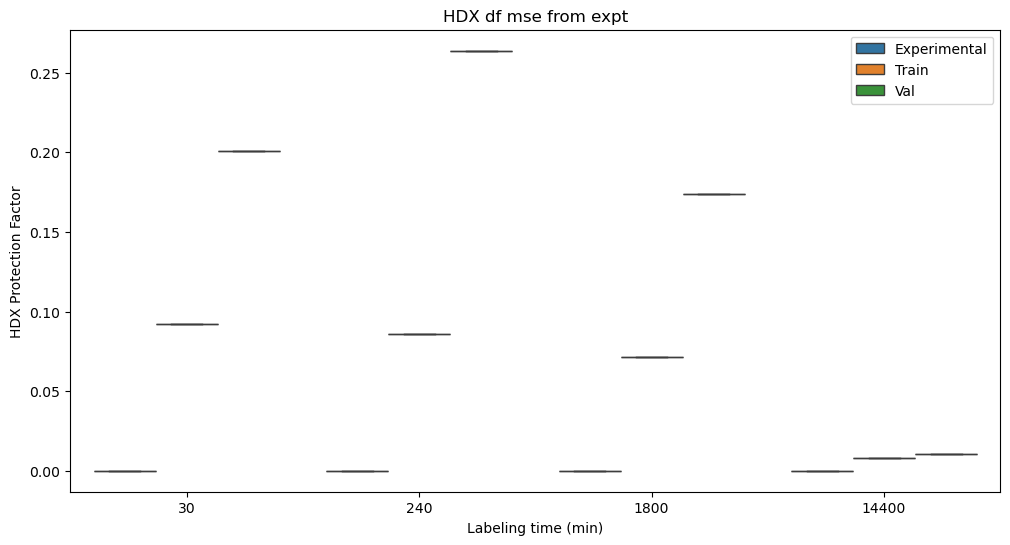

Saving experiment to:  logs/mixAandB_Sp9_1709132840.pkl


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:929: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


In [24]:

splits = ['S', 'SR', 'Sp']
split_names = ['AvsB', 'LvsX', 'mixAandB']
system = 'BPTITtut_test'

raw_run_outputs = {}
analysis_dumps = {}
analysis_df = pd.DataFrame()
names = []
save_paths = []


for split, split_name in zip(splits, split_names):
    run_outputs, analysis_dump, df, name, save_path = run_split_test(split, split_name, system)
    raw_run_outputs[name] = run_outputs
    analysis_dumps.update(analysis_dump)
    analysis_df = pd.concat([analysis_df, df])
    names.append(name)
    save_paths.append(save_path)



/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


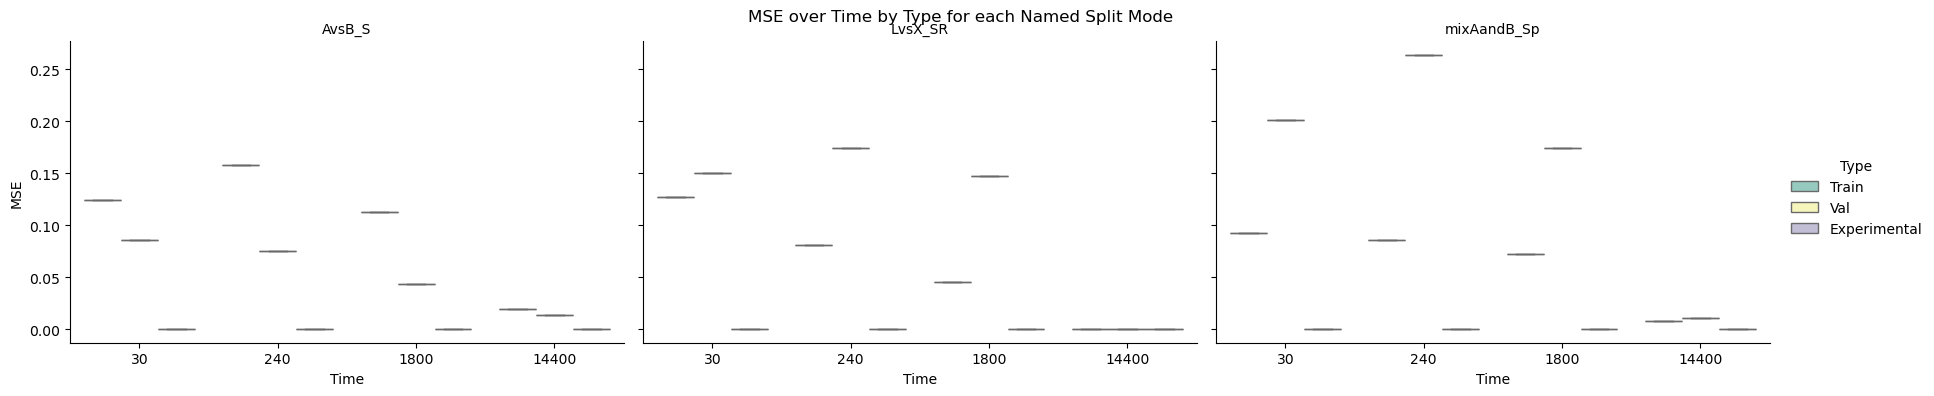

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


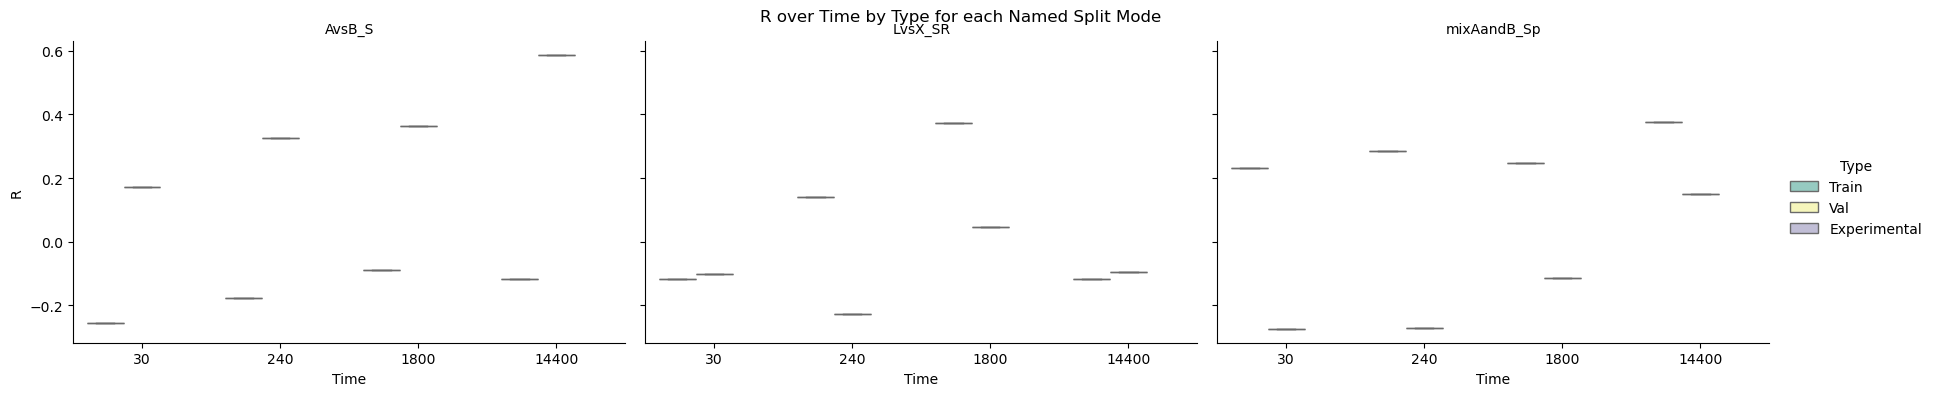

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


                                               LogPf                calc_name  \
0  [15.302517889526834, 17.27720294653977, 15.792...      train_MBPwt1_test_1   
1  [0.6440909090909084, 0.5431818181818175, 0.531...  no_weight_MBPwt1_test_1   
2  [0.8440950191587742, 0.7291089755573396, 0.737...        val_MBPwt1_test_1   
3  [0.8440950191587742, 0.7291089755573396, 0.737...       test_MBPwt1_test_1   
0  [0.32970950945296745, 0.20754915100553747, 0.1...      train_MBPwt1_test_1   
1  [0.6440909090909084, 0.5431818181818175, 0.531...  no_weight_MBPwt1_test_1   
2  [1.149370006303723, 0.7046111155694119, 0.5455...        val_MBPwt1_test_1   
3  [0.32970950945296745, 0.20754915100553747, 0.1...       test_MBPwt1_test_1   
0  [14.223940399407507, 14.429516383174322, 8.765...      train_MBPwt1_test_1   
1  [0.6440909090909084, 0.5431818181818175, 0.531...  no_weight_MBPwt1_test_1   
2  [0.749537233868497, 0.6223241538844965, 0.5948...        val_MBPwt1_test_1   
3  [0.749537233868497, 0.622

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

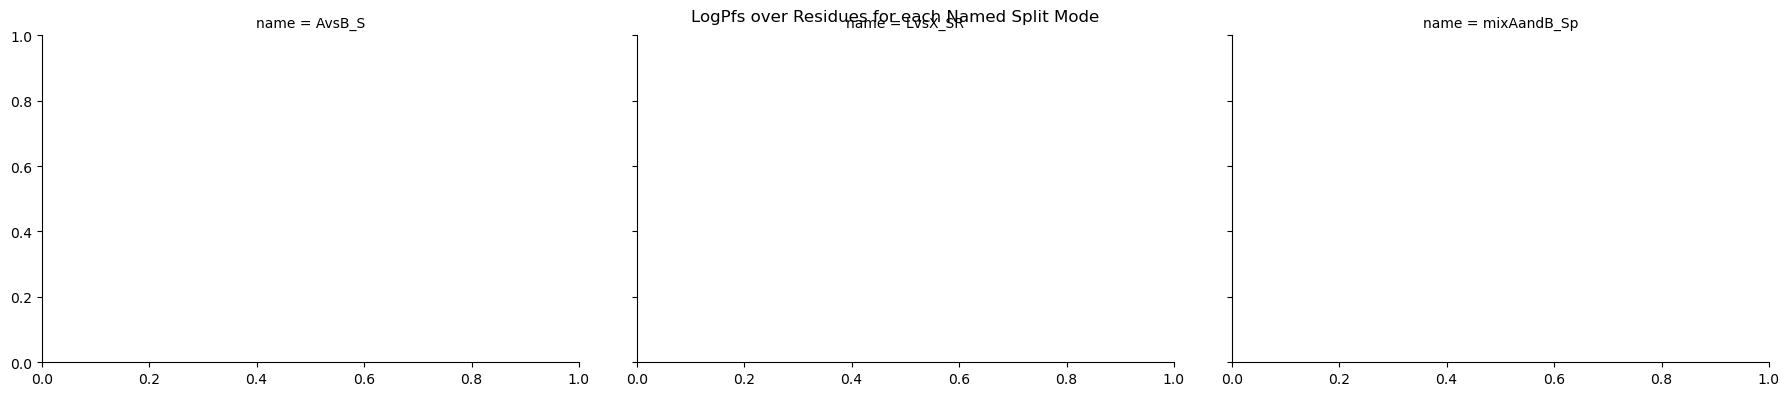

In [27]:
# plot LogPfs by Residues colour by calc_name facet wrap by name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
LogPfs = pd.concat([analysis_dumps[i]["LogPfs"] for i in names])

print(LogPfs)

LogPfs_df = LogPfs.explode(['LogPf','Residues'])


# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(LogPfs_df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('LogPfs over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.lineplot, "Residues", "LogPf", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "LogPf")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# from MDAnalysis.analysis.dssp import DSSP



In [ ]:
# VDX.paths.head()

In [ ]:
# print(top_path)

In [ ]:
# pdb_test = mda.Universe(top_path)

# # write out as a pdb and add header
# pdb_test.atoms.write('test.pdb')
# with open('test.pdb', 'r') as original: data = original.read()
# with open('test.pdb', 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)



In [ ]:


# def PDB_to_DSSP(top_path: str, dssp_path: str=None, sim_name: str=None):
#     """
#     Run DSSP on a PDB file to generate a DSSP file. Reads the output and returns a list of secondary structure elements.
#     Secondary structure elements are reduced to a single character: H (alpha helix), S (beta sheet), or L (loop).
#     Args:
#     - top_path (str): The path to the topology file to create the PDB file from.
#     - dssp_path (str): The path to save the DSSP file.
#     - sim_name (str): Simulation name to be included in the HEADER of the PDB file.
#     Returns:
#     - List of tuples, each containing the residue number and its secondary structure element.
#     """
#     temp_pdb = "do_mkdssp.pdb"

#     if sim_name is None:
#         sim_name = "DSSP HEADER"
#     if dssp_path is None:
#         dssp_path = "dssp_file.dssp"
#     print(top_path)
#     pdb_test = mda.Universe(top_path)

#     # write out as a pdb and add header
#     pdb_test.atoms.write(temp_pdb)


#     with open(temp_pdb, 'r') as original: data = original.read()
#     with open(temp_pdb, 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)

#     # Run mkdssp to generate DSSP file
#     try:
#         subprocess.run(['mkdssp', temp_pdb,  dssp_path], check=True)
#     except subprocess.CalledProcessError as e:
#         print(f"Error running DSSP: {e}")
#         return []

#     # Parse the DSSP file
#     secondary_structures = []
#     with open(dssp_path, 'r') as dssp_file:
#         # Skip header lines
#         for line in dssp_file:
#             if line.startswith('  #  RESIDUE AA'):
#                 break
#         # Read the secondary structure assignments
#         for line in dssp_file:
#             if len(line) > 13:  # Ensure line has enough data
#                 residue_num = line[5:10].strip()
#                 ss = line[16]
#                 # Simplify the secondary structure to H, S, or L
#                 if ss in 'GHI':
#                     ss = 'H'  # Helix
#                 elif ss in 'EB':
#                     ss = 'S'  # Sheet
#                 else:
#                     ss = 'L'  # Loop or other
#                 secondary_structures.append((residue_num, ss))

#     # Cleanup temp PDB file
#     os.remove(temp_pdb)
#     os.remove(dssp_path)
#     print(len(secondary_structures))
#     print(len(pdb_test.residues))
#     return secondary_structures

